## To reviewer: 
### This is to inform you about the inappropriate mapping of the week of the day to 0-6 in the source file day.csv. In this file, 01-01-2018 Monday is mapped to 6 under 'weekday', 02-01-2018 Tuesday to 0, 03-01-2018 wednesday to 1, and so on. 

### Owing to this non-standard mapping, the 'workingday' column is also impacted, e.g., 01-01-2018 Monday is marked as a non-working day (as indicated by 0 in the 'workingday' column) although it is not a holiday or a weekend.

### Therefore, both the 'weekday' and 'workingday' columns have been logically corrected in the data pre-processing step. 

### The name of the day has been directly extracted from the date provided in the 'dteday' column and stored in a temporary column variable 'day_name' that is subsequently renamed as 'weekday' after dropping the actual 'weekday' column in the dataframe.

### The 'workingday' column has been corrected through some additional lines of code by using the logic provided in the data dictionary  (workingday : if day is neither weekend nor holiday is 1, otherwise is 0).





 # Problem Statement: Modelling the demand for shared bikes based on Multiple Linear Regression to reveal the significant predictors of demand for shared bikes.

# Importing necessary libraries

In [221]:
import pandas as pd   # for sourcing dataset into a dataframe and subsequent manipulation and analysis
import numpy as np    # for numerical calculations


import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for aesthetic and advanced data visualization


import sklearn   # for model building
from sklearn.model_selection import train_test_split  # for splitting the dataset into train and test datasets
from sklearn.preprocessing import MinMaxScaler  # for feature scaling
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  # for recursive feature elimination during model building
from sklearn.metrics import r2_score     # to calculate the R-squared score on the test set


# While both sklearn and statsmodels libraries can enable building the model, statsmodels provides a more comprehensive summary of the model statistics, which justifies its utilization for the problem at hand 
import statsmodels
import statsmodels.api as sm  #for displaying detailed summary statistics of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor  #to check the VIF values of feature variables


import warnings
warnings.filterwarnings('ignore') #to prevent display of warnings

# Sourcing and Understanding Data

In [222]:
df = pd.read_csv('day.csv') # importing the data into dataframe  
print ("Shape of the dataframe:", df.shape)  # printing the shape of the dataframe
df

Shape of the dataframe: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


The data dictionary provided with the source file is shown here.

day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few   clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light  Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [223]:
print(df.nunique())   # printing the number of unique values for each column of the dataframe

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [224]:
# printing some basic information about the dataset to particularly view the column names and the datatype and non-null count of every column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [225]:
print(df.isnull().sum())   # printing the count of null values in each column of the dataframe

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


It is evident that there are no null values in any column of the dataframe. 
( This information is also implicit in the non-null count observed by using the info() method in the preceding code snippet. )

# Data Preparation

### Dropping and deriving columns

The 'instant' column can be dropped as it is unique for each record and therefore cannot be an effective predictor of the overall demand.

In [226]:
df = df.drop(['instant'], axis=1) # dropping 'instant' column
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


The 'cnt' variable indicates the total number of bike rentals, including both casual and registered, where the variable 'casual' indicates the number casual users who have made a rental and the variable 'registered' indicates the total number of registered users who have made a booking on a given day. It is confirmed that the 'cnt' column is a summation of the 'casual' and 'registered' columns. Therefore, we can drop the 'casual' and 'registered' columns without any information loss.

In [227]:
df = df.drop(['registered','casual'], axis=1) # dropping the'casual' and 'registered' columns
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


**Now, since the year and month information in the 'yr' and 'mnth' columns, respectively, is also conveyed by the 'dteday' column, we need to address this redundancy. Therefore, from the date information in 'dteday', we will extract the day in a column called 'day'. Thereafter, we can drop 'dteday'.**

**Furthermore, it is noted that 'weekday' is actually a catagorical variable with 7 levels, each level representing the day of the week. Since we will anyway have to handle the catagorical variables in the subsequent steps by mapping them and creating dummy variables, for convenience, we will also extract the day name from the 'dteday' (before we drop 'dteday') into a new column called 'day_name'. Thereafter, we can drop 'weekday' and rename 'day_name' as 'weekday'.**

**Finally, we can drop 'dteday', since the day, month, year, and day name are available in the 'day', 'mnth', 'yr', and 'weekday' columns, respectively.**

In [228]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')    # to_datetime method will parse the date in the given format, resulting in the standard pandas date format "yyyy-mm-dd".

df['day_name'] = df['dteday'].dt.day_name().astype(str)  # to extract the name of the day in a separate column from 'dteday' and explicitly convert the values to string type

df['day'] = df['dteday'].dt.day  #to extract only the day component in a separate column from the date in 'dteday'


df = df.drop(['dteday','weekday'], axis=1)  # dropping the 'dteday' and 'weekday' column


df = df.rename(columns={"day_name": "weekday"})    # renaming the 'day_name' column to 'weekday'


print ("The dataframe after dropping unncessary columns and deriving features is ")
df

The dataframe after dropping unncessary columns and deriving features is 


,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday,day
0,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985,Monday,1
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday,2
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,3
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday,4
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,1,2,10.420847,11.33210,65.2917,23.458911,2114,Friday,27
726,1,1,12,0,1,2,10.386653,12.75230,59.0000,10.416557,3095,Saturday,28
727,1,1,12,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,Sunday,29
728,1,1,12,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,Monday,30


#### Logical Correction of the 'workingday' column based on the logic provided in the data dictionary (i.e., workingday: 1 if day is neither weekend nor holiday is 1, otherwise 0)

In [229]:
df['workingday'] = 0  # Initializing 'workingday' column to 0

# Updating 'workingday' based on the logic specified in the date dictionary 
df.loc[(df['weekday'] != 'Saturday') & (df['weekday'] != 'Sunday') & (df['holiday'] != 1), 'workingday'] = 1

In [230]:
print ("The dataframe after dropping unncessary columns, deriving features, and making logical corrections is ")
df

The dataframe after dropping unncessary columns, deriving features, and making logical corrections is 


,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday,day
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,Monday,1
1,1,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday,2
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,3
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday,4
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,1,2,10.420847,11.33210,65.2917,23.458911,2114,Friday,27
726,1,1,12,0,0,2,10.386653,12.75230,59.0000,10.416557,3095,Saturday,28
727,1,1,12,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,Sunday,29
728,1,1,12,0,1,1,10.489153,11.58500,48.3333,23.500518,1796,Monday,30


### Handling catagorical variables: mapping

The data dictionary is used to map the levels of non-binary catagorical variables to the actual respective labels.

In [231]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}).astype(str)

# for convenience, in case of 'weathersit', shorter strings have been used as values to the keys in order to approximate the actual long string correspondences in the data dictionary
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'}).astype(str)  

df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}).astype(str)

print ("The updated dataframe:")
df

The updated dataframe:


,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday,day
0,spring,0,January,0,1,mist,14.110847,18.18125,80.5833,10.749882,985,Monday,1
1,spring,0,January,0,1,mist,14.902598,17.68695,69.6087,16.652113,801,Tuesday,2
2,spring,0,January,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,3
3,spring,0,January,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,Thursday,4
4,spring,0,January,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,1,mist,10.420847,11.33210,65.2917,23.458911,2114,Friday,27
726,spring,1,December,0,0,mist,10.386653,12.75230,59.0000,10.416557,3095,Saturday,28
727,spring,1,December,0,0,mist,10.386653,12.12000,75.2917,8.333661,1341,Sunday,29
728,spring,1,December,0,1,clear,10.489153,11.58500,48.3333,23.500518,1796,Monday,30


In [232]:
print (df.info())
print ("\n Count of unique values in each feature \n", df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  weekday     730 non-null    object 
 12  day         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB
None

 Count of unique values in each feature 
 season          4
yr              2
mnth           12
holiday         2
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspe

In [233]:
#For clarity, we can broadly divide all variables into two types - Categorical variables and Numeric variables.
categorical_variables = ["season", "yr", "mnth", "holiday", "workingday", "weathersit", "weekday"]
numeric_variables = ["temp", "atemp", "hum", "windspeed", "cnt", "day"]

# Univariate, bivariate, and multivariate data analysis & data visualization

Frequency count for season:
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64



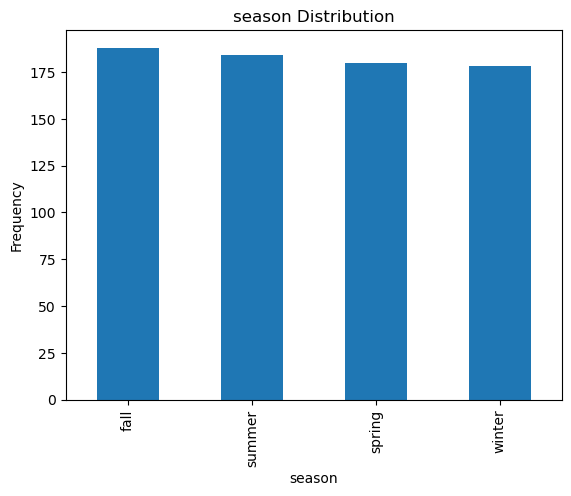

Frequency count for yr:
0    365
1    365
Name: yr, dtype: int64



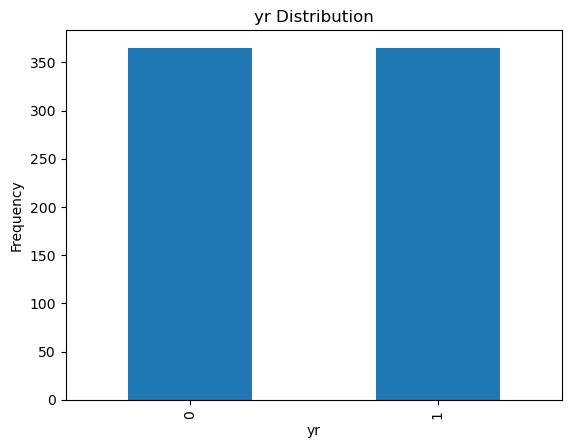

Frequency count for mnth:
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64



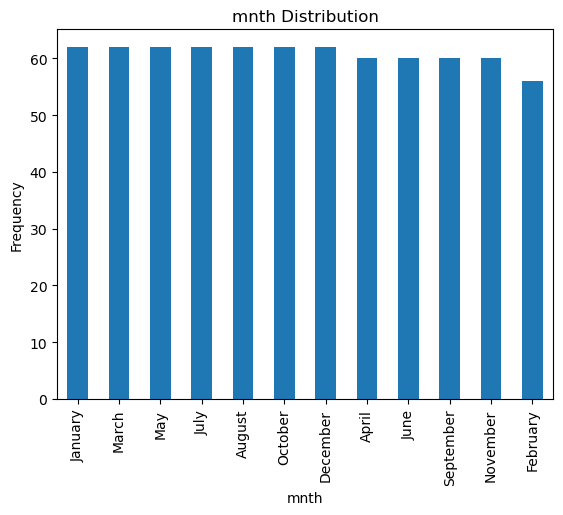

Frequency count for holiday:
0    709
1     21
Name: holiday, dtype: int64



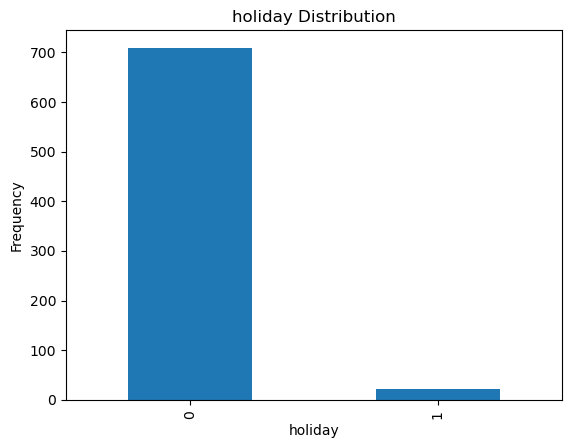

Frequency count for workingday:
1    504
0    226
Name: workingday, dtype: int64



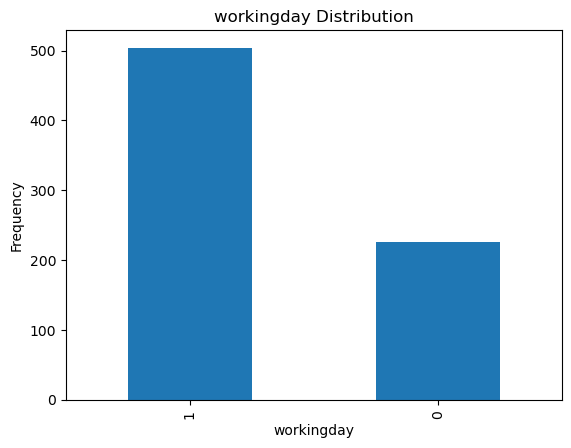

Frequency count for weathersit:
clear    463
mist     246
light     21
Name: weathersit, dtype: int64



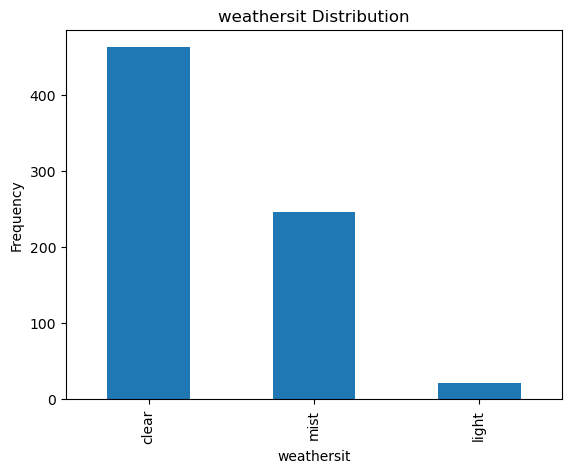

Frequency count for weekday:
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64



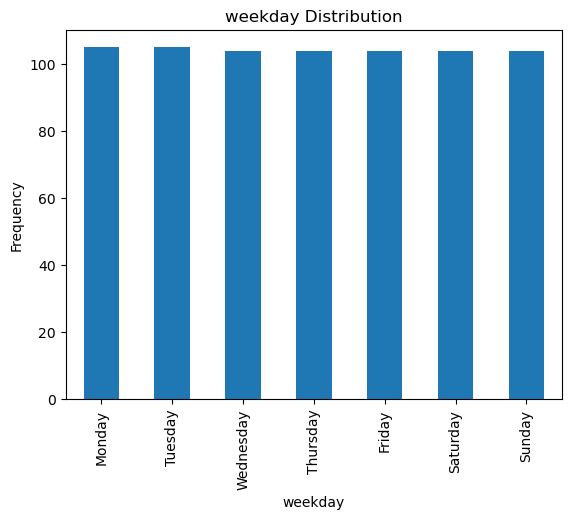

In [234]:
# Univariate analysis on categorical variables

for var in categorical_variables:
    # Frequency count
    freq_count = df[var].value_counts()
    print(f"Frequency count for {var}:")
    print(freq_count)
    print()
    
    # Bar plot
    plt.figure()
    df[var].value_counts().plot(kind='bar')
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


#### While the data distributions across all seasons, the two years, and all days of the week do not exhibit drastic differences, the clear-weather, working-day, and no-holiday conditions are observed to be more prevalent over other conditions.

Summary statistics for temp:
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64



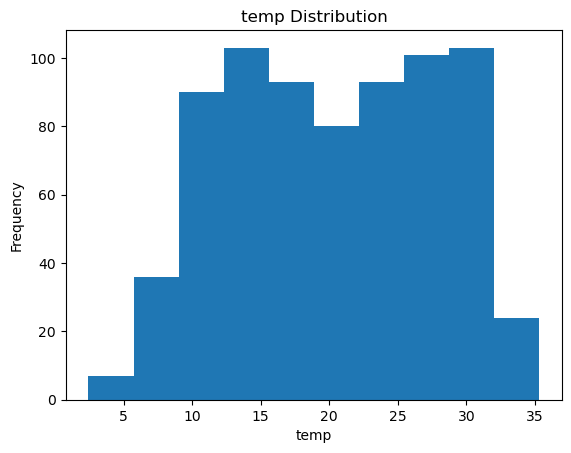

Summary statistics for atemp:
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64



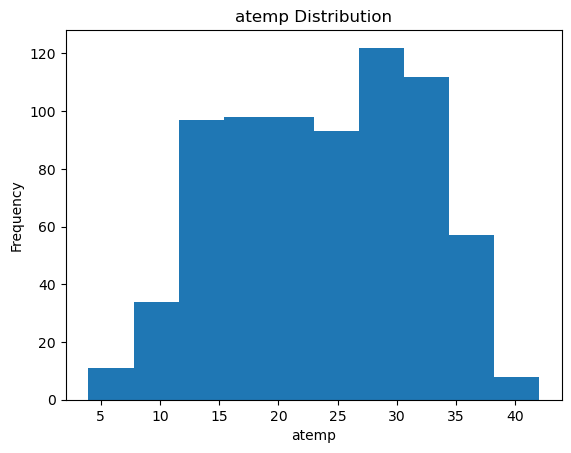

Summary statistics for hum:
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64



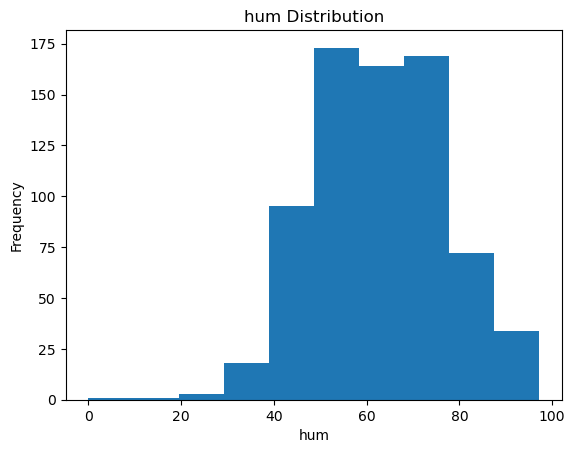

Summary statistics for windspeed:
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64



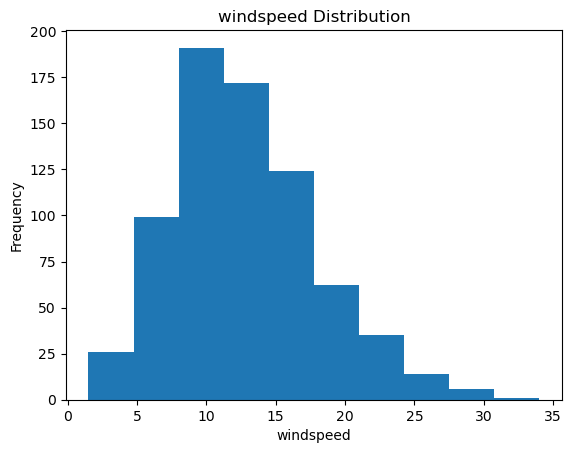

Summary statistics for cnt:
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64



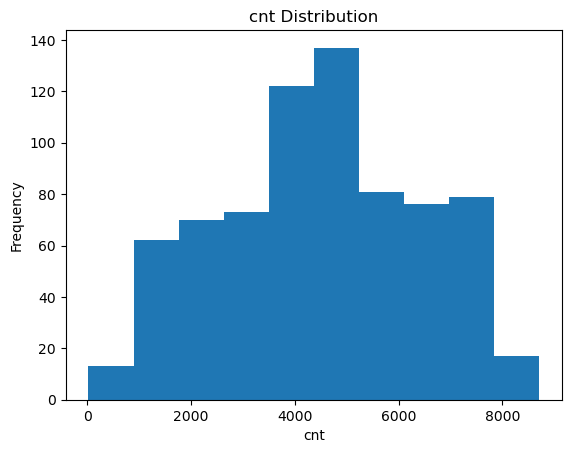

Summary statistics for day:
count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: day, dtype: float64



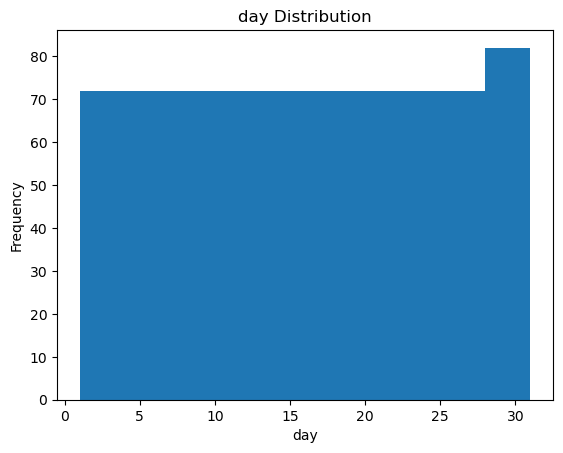

In [235]:
# Univariate analysis on numeric variables

for var in numeric_variables:
    # Summary statistics
    summary = df[var].describe()
    print(f"Summary statistics for {var}:")
    print(summary)
    print()
    
    # Histogram
    plt.figure()
    plt.hist(df[var], bins=10)
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

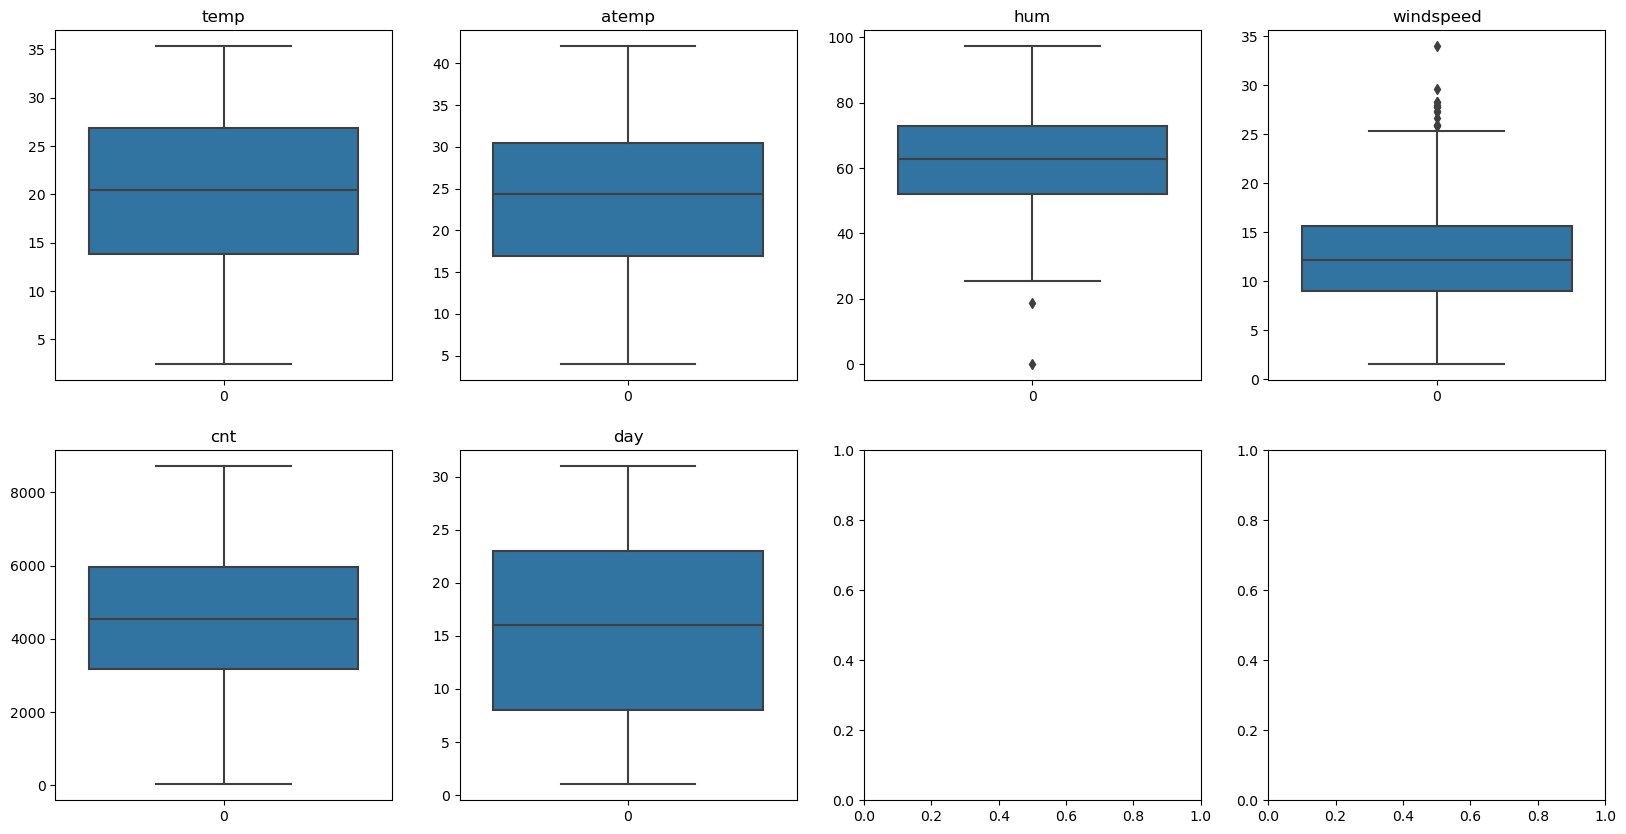

In [236]:
# Visualizing outliers through boxplots

# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Looping through the columns and plotting each continuous variable on a boxplot
for i, j in enumerate(numeric_variables):
    row = i // 4
    col = i % 4
    ax = axes[row][col]    #The ax parameter is used to specify the subplot to plot each column on
    sns.boxplot(df[j], ax=ax)
    ax.set_title(j)

plt.show()

It is clear that only 'hum' and 'windspeed' have outliers.

In [237]:
# The following lines of code further verify the presence of outliers and print their count.


# Function to get upper and lower threshold values to check outlier
def outlier_thresholds(df, column_name, q1=0.25, q3=0.75):
    quartile_1 = df[column_name].quantile(q1)
    quartile_3 = df[column_name].quantile(q3)
    iqr = quartile_3 - quartile_1 # inter quartile range
    upper = quartile_3 + 1.5 * iqr
    lower = quartile_1 - 1.5 * iqr
    return lower, upper

def check_outlier(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    if df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)].any(axis = None):
        return True
    return False

columns_with_outliers = []
for col in numeric_variables:
    if check_outlier(df, col):
        columns_with_outliers.append(col)
print("Columns with outliers:", columns_with_outliers)



# Calculation of the upper quantile of the 'windspeed' column
upper_quantile = df['windspeed'].quantile(0.75)

# Identification of outliers (values greater than the upper quantile)
outliers = df[df['windspeed'] > upper_quantile]

# Counting the number of outliers
num_outliers = len(outliers)

# Displaying the number of outliers
print(f"Number of outliers in 'windspeed' column above the upper quantile: {num_outliers}")



# Calculation of the lower quantile of the 'hum' column
lower_quantile = df['hum'].quantile(0.25)

# Identifying the outliers (values lesser than the lower quantile)
outliers = df[df['hum'] < lower_quantile]

# Counting the number of outliers
num_outliers = len(outliers)

# Displaying the number of outliers
print(f"Number of outliers in 'hum' column below the lower quantile: {num_outliers}")


Columns with outliers: ['hum', 'windspeed']
Number of outliers in 'windspeed' column above the upper quantile: 183
Number of outliers in 'hum' column below the lower quantile: 182


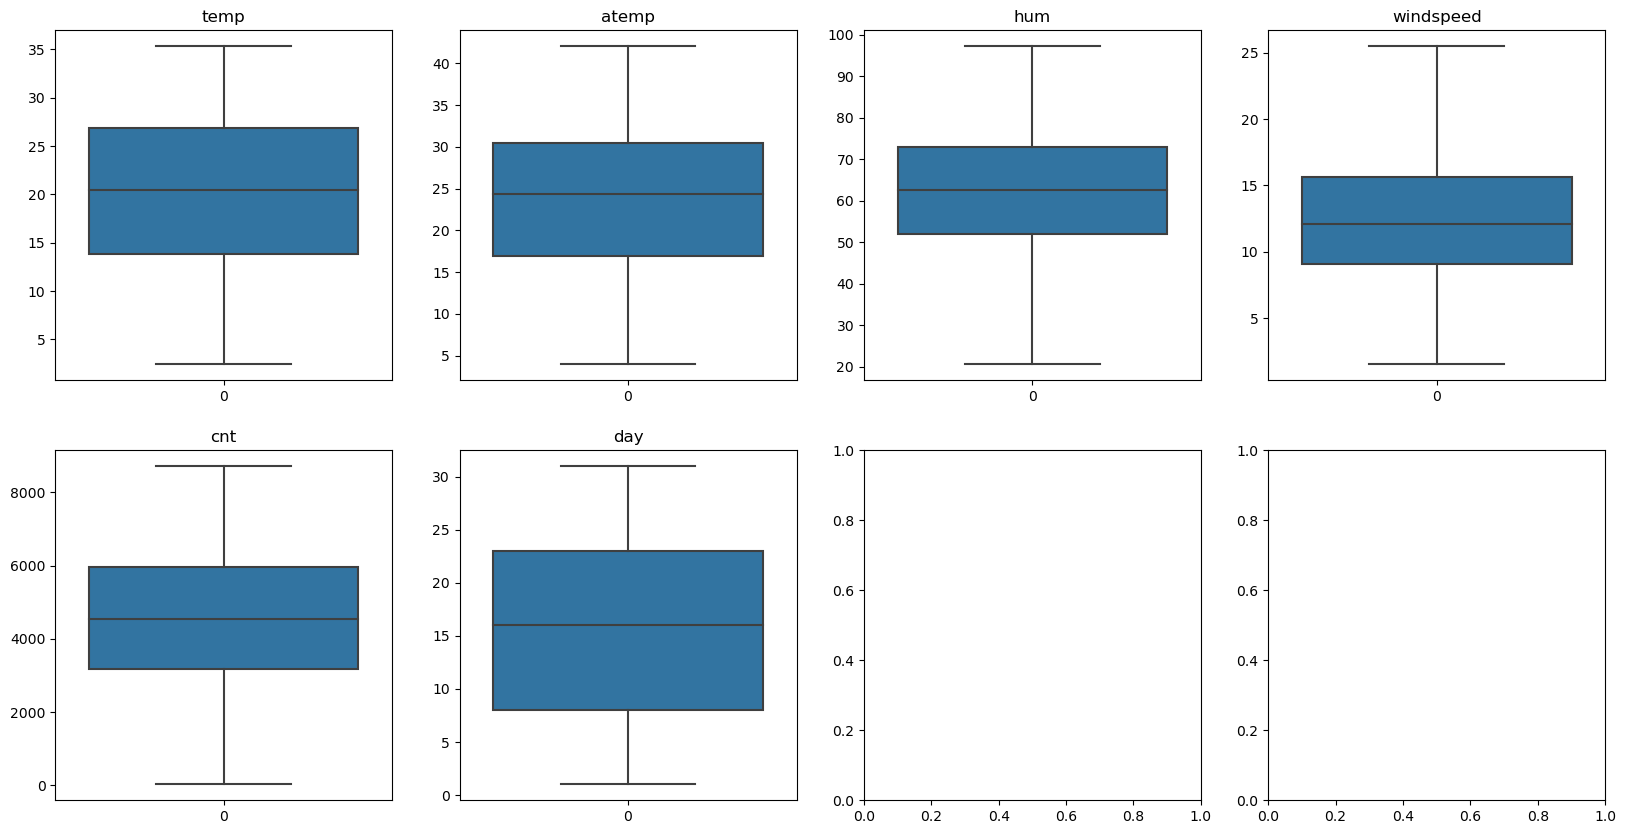

In [19]:
# Fixing outliers 

def fix_outliers(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    # values less than lower_threshold is replaced by lower_threshold
    df.loc[(df[column_name] < lower_threshold), column_name] = lower_threshold
    # values more than upper_threshold is replaced by upper_threshold
    df.loc[(df[column_name] > upper_threshold), column_name] = upper_threshold

for col in columns_with_outliers:
    fix_outliers(df, col)

    
    

# Final boxplot visualization post removal of outliers

# Setting up the subplots after removing outliers 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Looping through the columns and plotting each continuous variable on a boxplot
for i, j in enumerate(numeric_variables):
    row = i // 4
    col = i % 4
    ax = axes[row][col]    
    sns.boxplot(df[j], ax=ax)
    ax.set_title(j)

plt.show()

Here we have addressed the outliers by setting them to the closest thresholds.

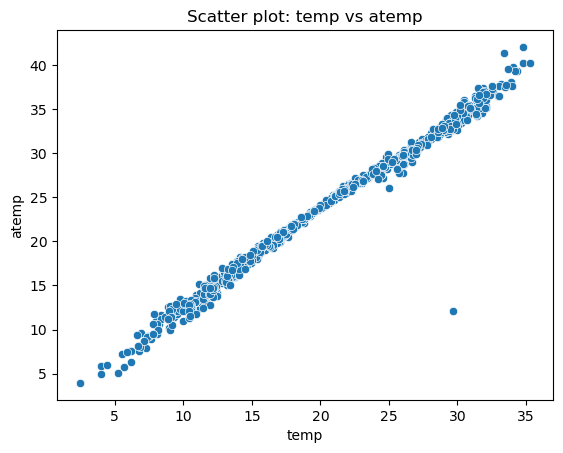

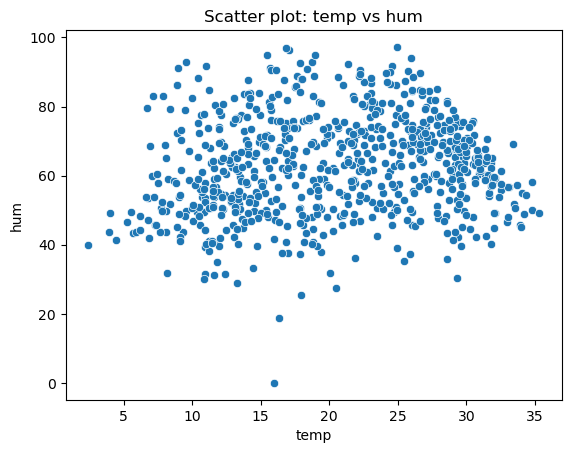

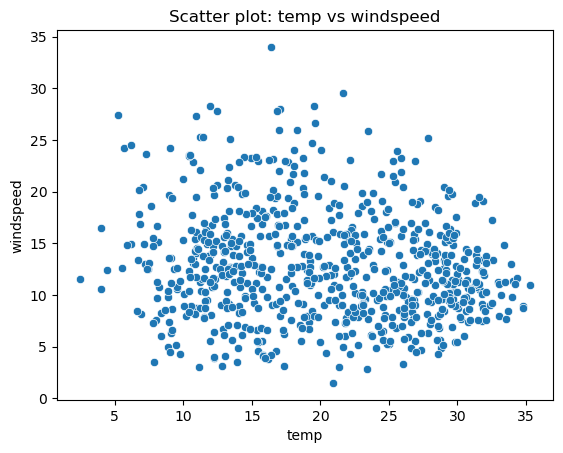

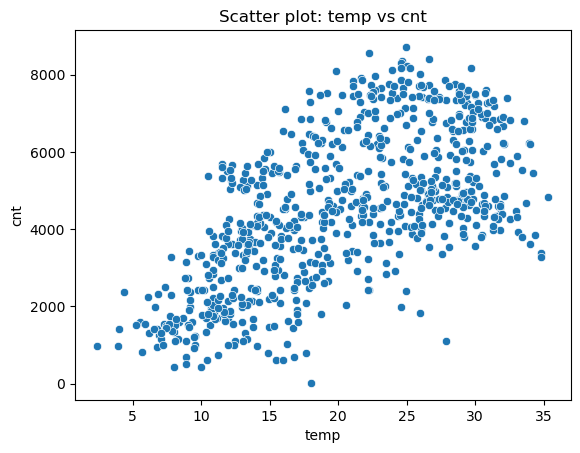

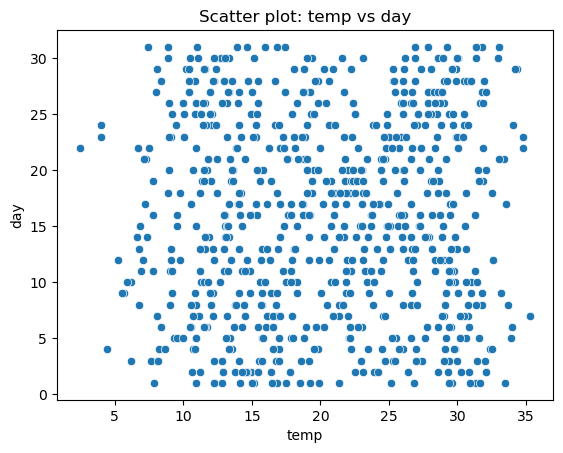

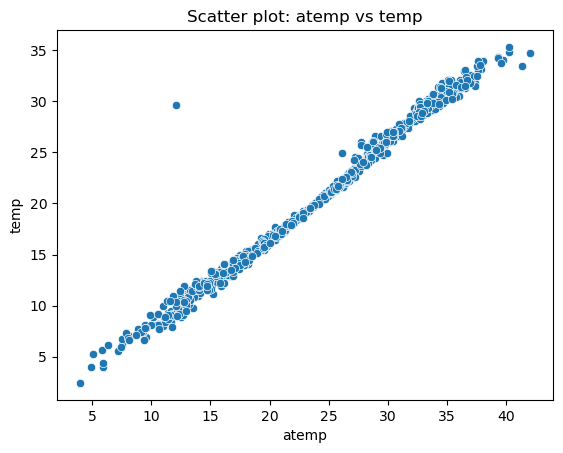

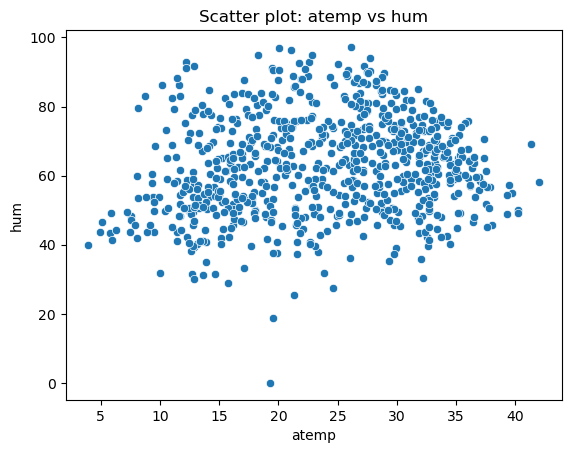

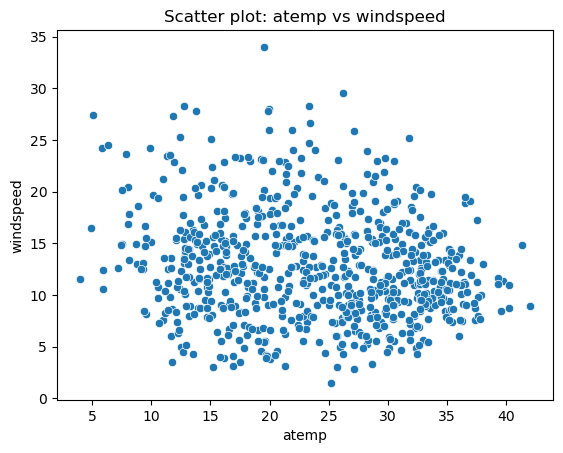

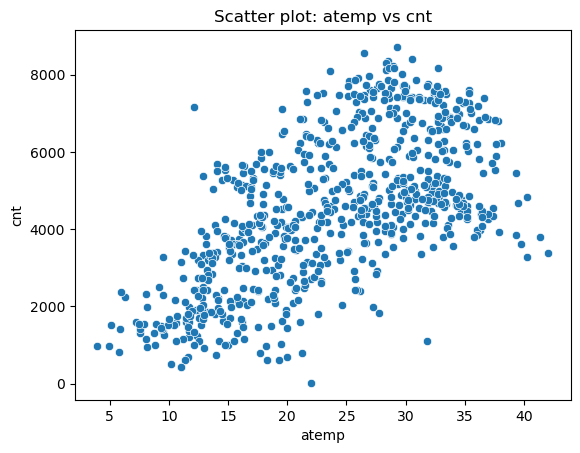

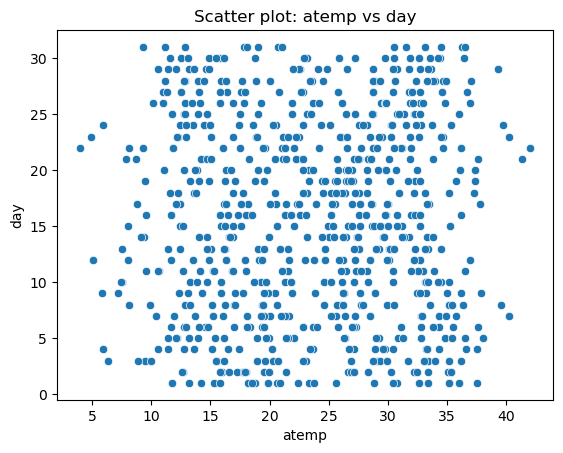

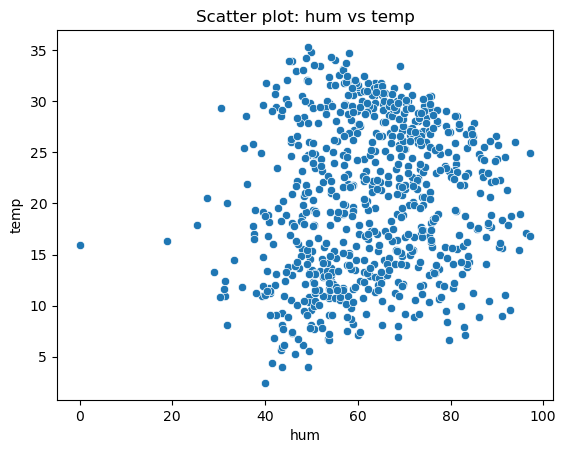

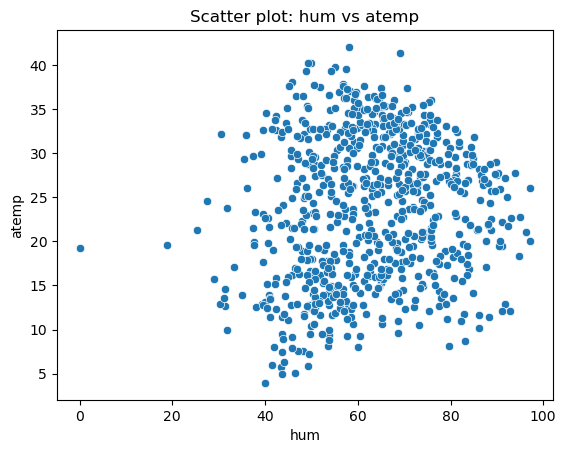

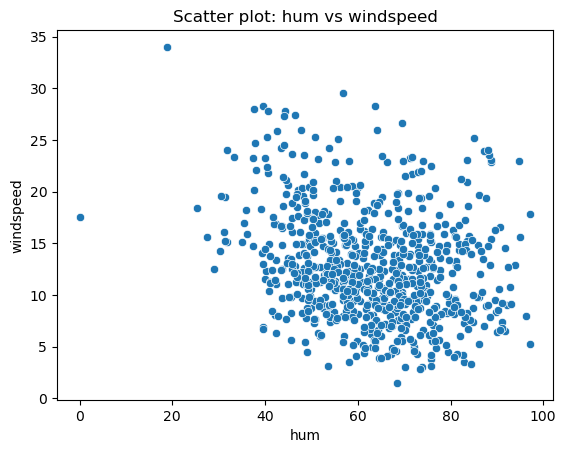

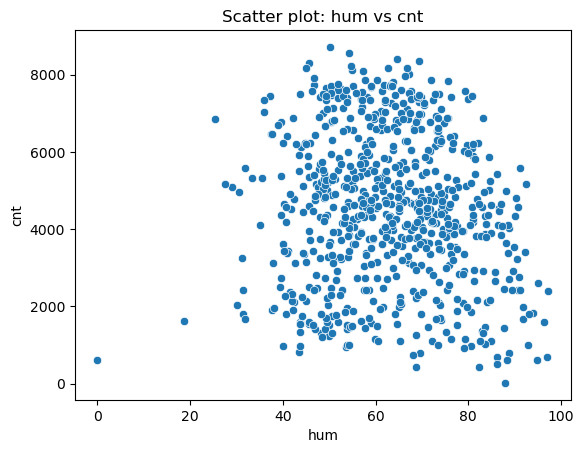

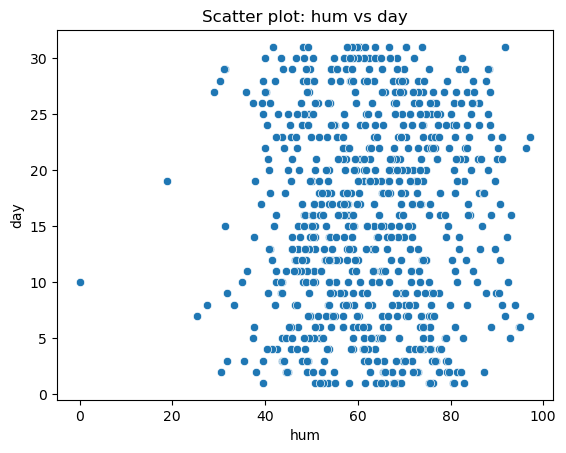

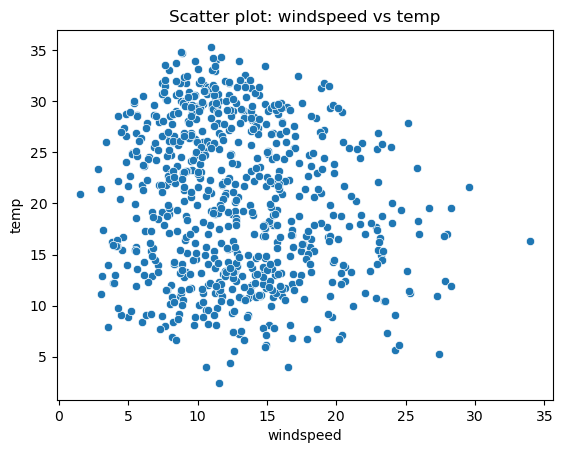

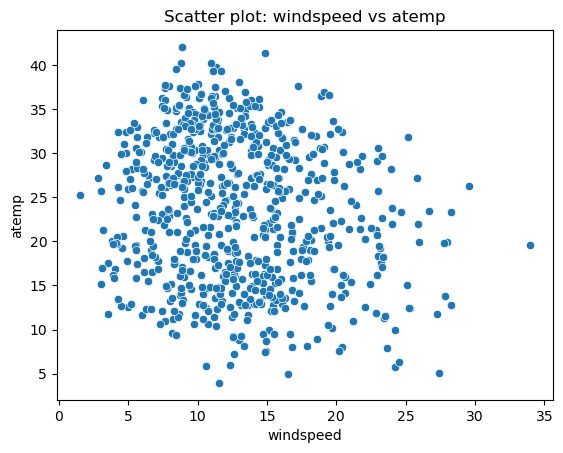

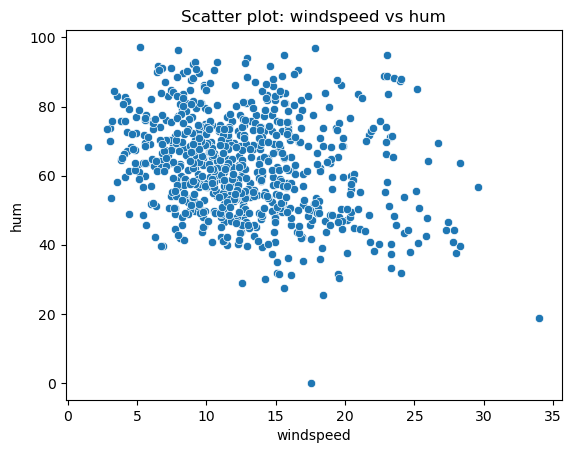

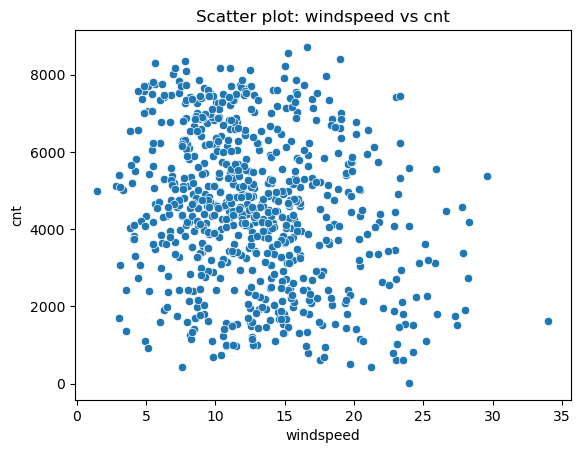

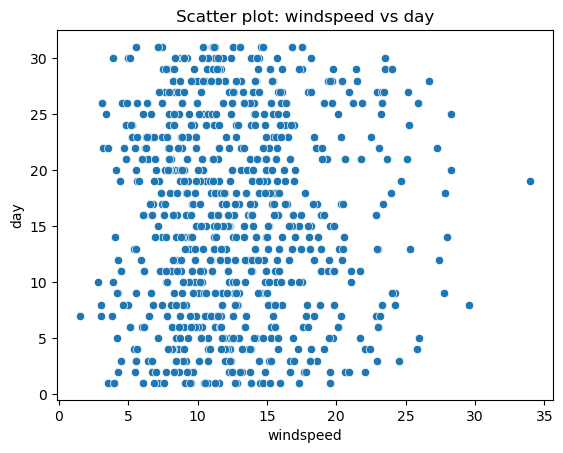

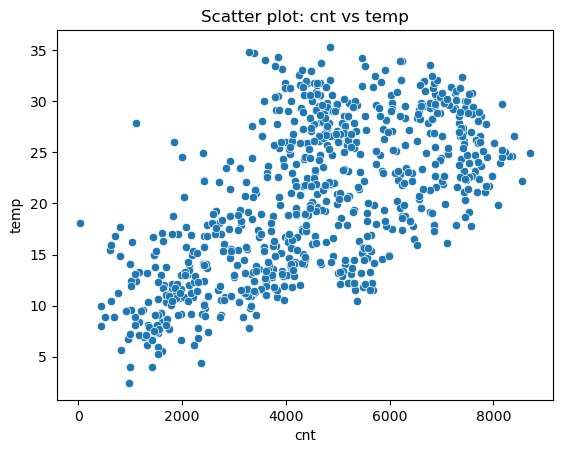

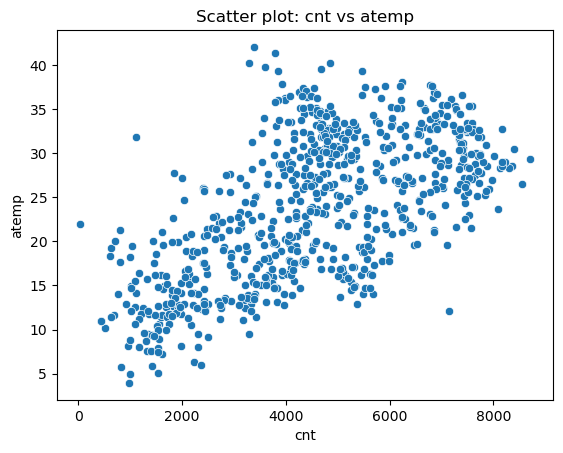

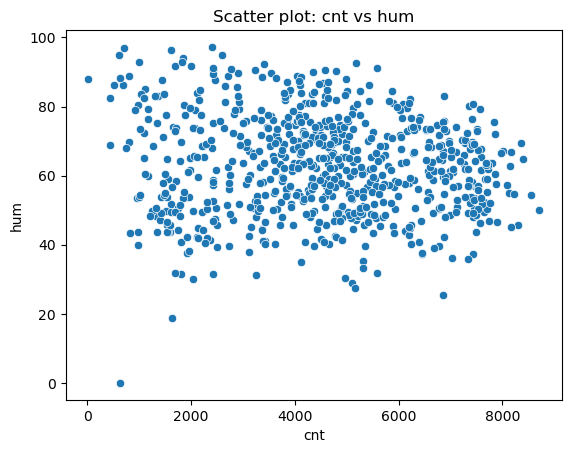

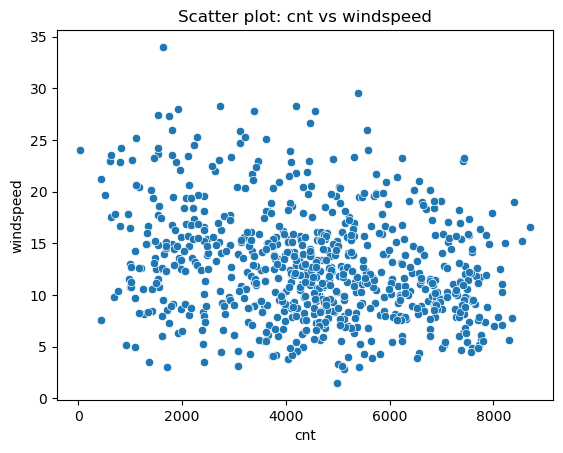

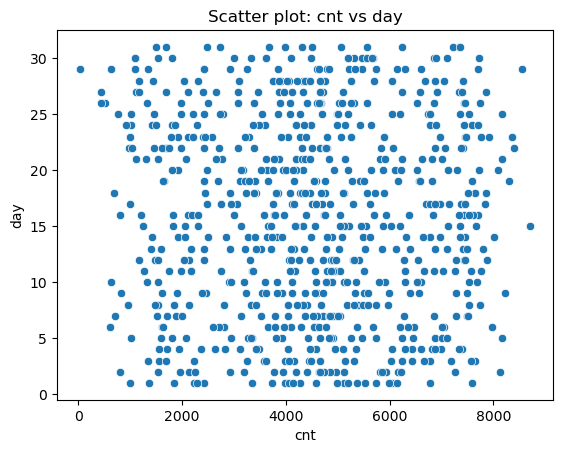

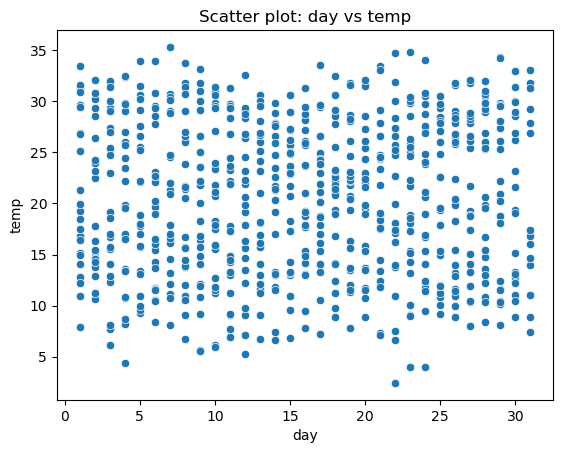

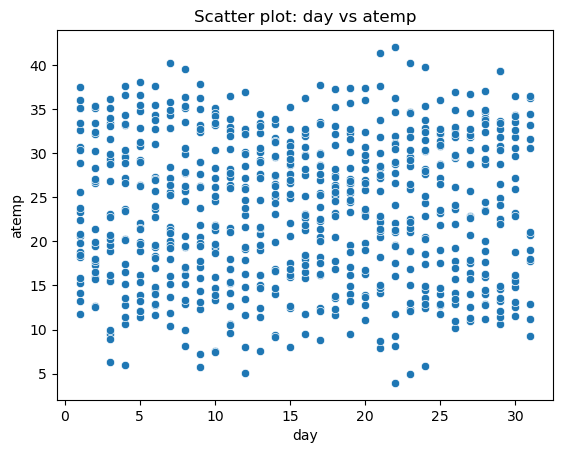

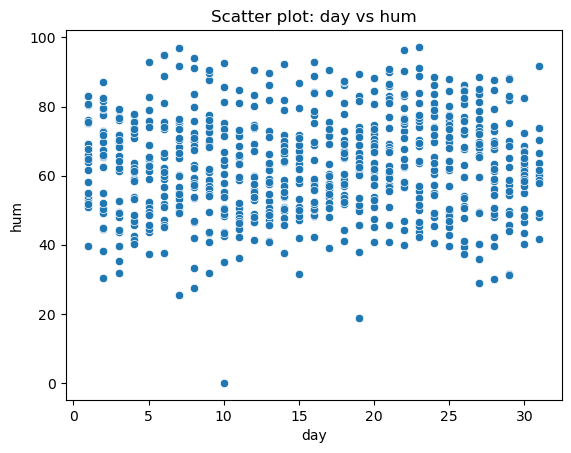

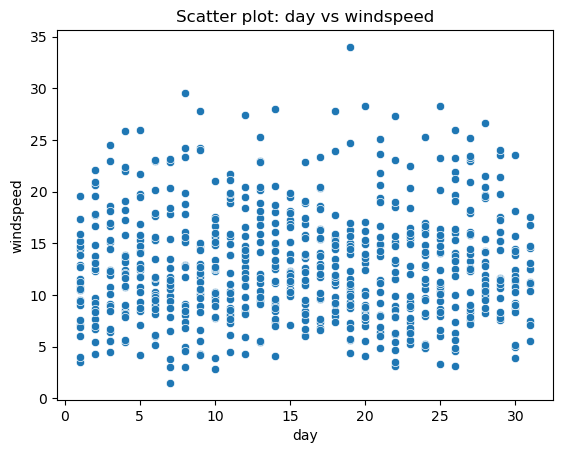

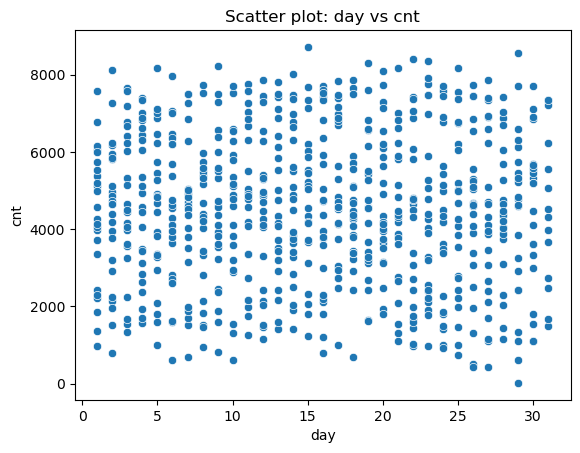

In [238]:
# Bivariate analysis
# Scatter plot: numeric vs numeric

for num_var1 in numeric_variables:
    for num_var2 in numeric_variables:
        if num_var1 != num_var2:
            plt.figure()
            sns.scatterplot(data=df, x=num_var1, y=num_var2)
            plt.title(f"Scatter plot: {num_var1} vs {num_var2}")
            plt.show()

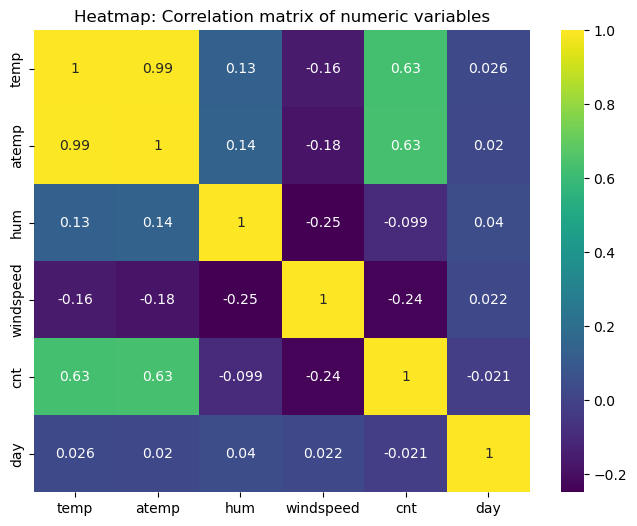

The top 3 pairs of variables with the largest absolute correlations: 
 atemp  temp    0.991696
       cnt     0.630685
cnt    temp    0.627044
dtype: float64


In [239]:
# Bivariate analysis
# corelation analysis using heat map for numeric variables

# Subsetting the DataFrame for only numeric variables
numeric_df = df[numeric_variables]

# Computing the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Heatmap: Correlation matrix of numeric variables")
plt.show()



#the following steps are performed to obtain the most corelated pairs

corr_abs_num = corr_matrix.abs() # to obtain the absolute correlation matrix

# creating a multi-level index of all possible pairs of variables and their correlations
corr_pairs_num = corr_abs_num.unstack().sort_values(ascending=False)

# excluding pairs with identical variables
corr_pairs_num = corr_pairs_num[(corr_pairs_num != 1) & (corr_pairs_num.index.get_level_values(0) != corr_pairs_num.index.get_level_values(1))]

# removing duplicates by keeping only pairs with variables in lexicographical order
corr_pairs_num = corr_pairs_num[corr_pairs_num.index.to_series().apply(lambda x: x[0] < x[1])]

# printing the top 3 pairs of variables with the largest absolute correlations
print("The top 3 pairs of variables with the largest absolute correlations: \n", corr_pairs_num.nlargest(3))

**Noting the high corelation between 'temp' and 'atemp', we proceed with dropping 'atemp' column.**

In [240]:
df = df.drop(['atemp'], axis=1)  # dropping the 'atemp' column
numeric_variables = ['temp', 'hum', 'windspeed', 'cnt', 'day']  # updating numeric_variables to eliminate 'atemp' 
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,weekday,day
0,spring,0,January,0,1,mist,14.110847,80.5833,10.749882,985,Monday,1
1,spring,0,January,0,1,mist,14.902598,69.6087,16.652113,801,Tuesday,2
2,spring,0,January,0,1,clear,8.050924,43.7273,16.636703,1349,Wednesday,3
3,spring,0,January,0,1,clear,8.200000,59.0435,10.739832,1562,Thursday,4
4,spring,0,January,0,1,clear,9.305237,43.6957,12.522300,1600,Friday,5


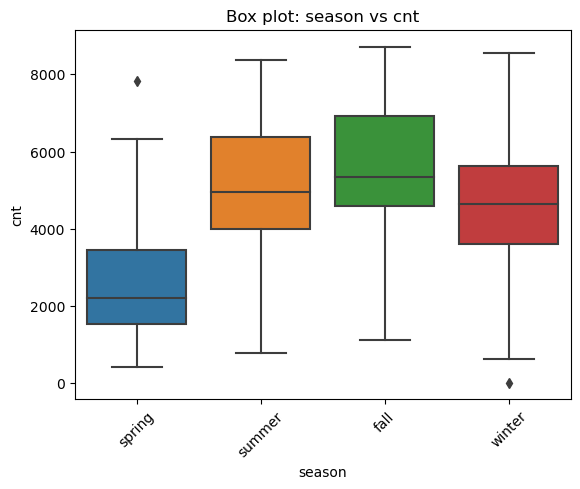

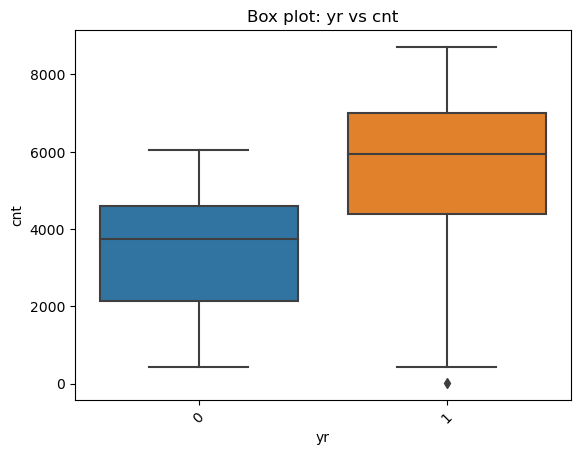

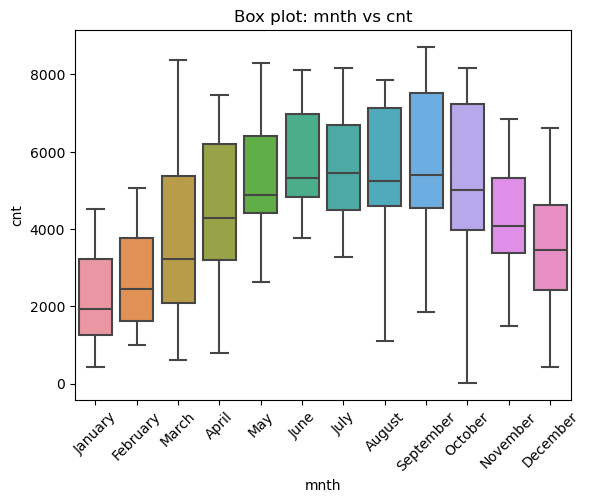

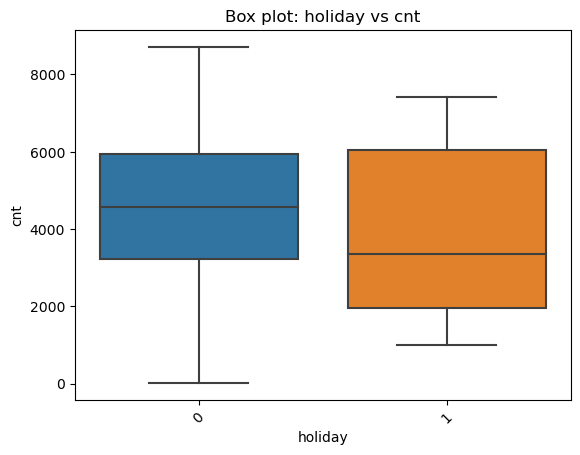

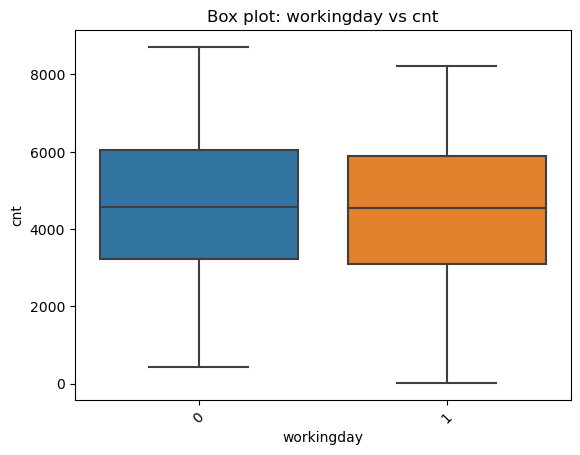

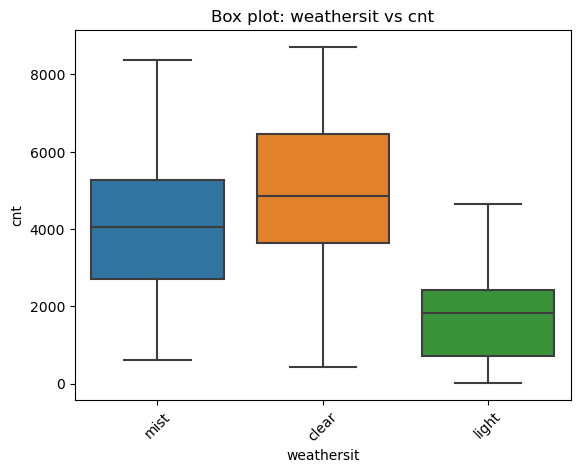

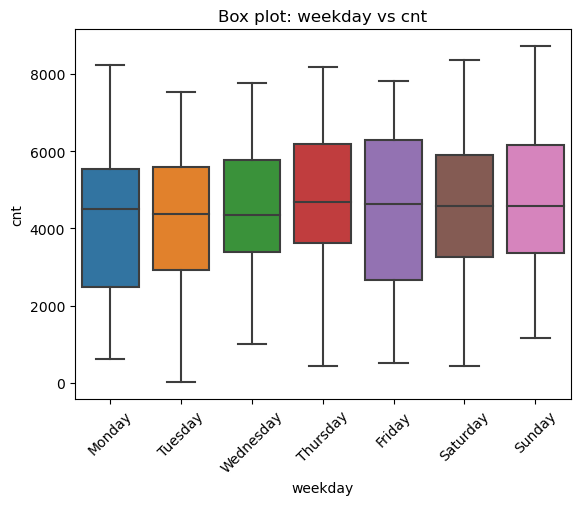

In [241]:
# Bivariate analysis
# Box plot: categorical vs numerical (our target variable 'cnt')

for cat_var in categorical_variables:
    plt.figure()
    ax = sns.boxplot(data=df, x=cat_var, y='cnt')
    plt.title(f"Box plot: {cat_var} vs cnt")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

**It is observed that the count of the total rental bikes (including both casual and registered)**
- varies substantially across all seasons, reaching drastically the lowest values in spring and the highest values in fall.
- is considerably higher in 2019 than in 2018
- varies considerably across all months throughout the year
- is lower when there is a holiday
- does not exhibit any significant differences in its median and upper & lower quantiles irrespective of whether the day is a working day or not
- varies substantially across the diverse weather conditions indiacted by 'mist', 'clear', and 'light'
- exhibits only mild changes in its median across the days of the week

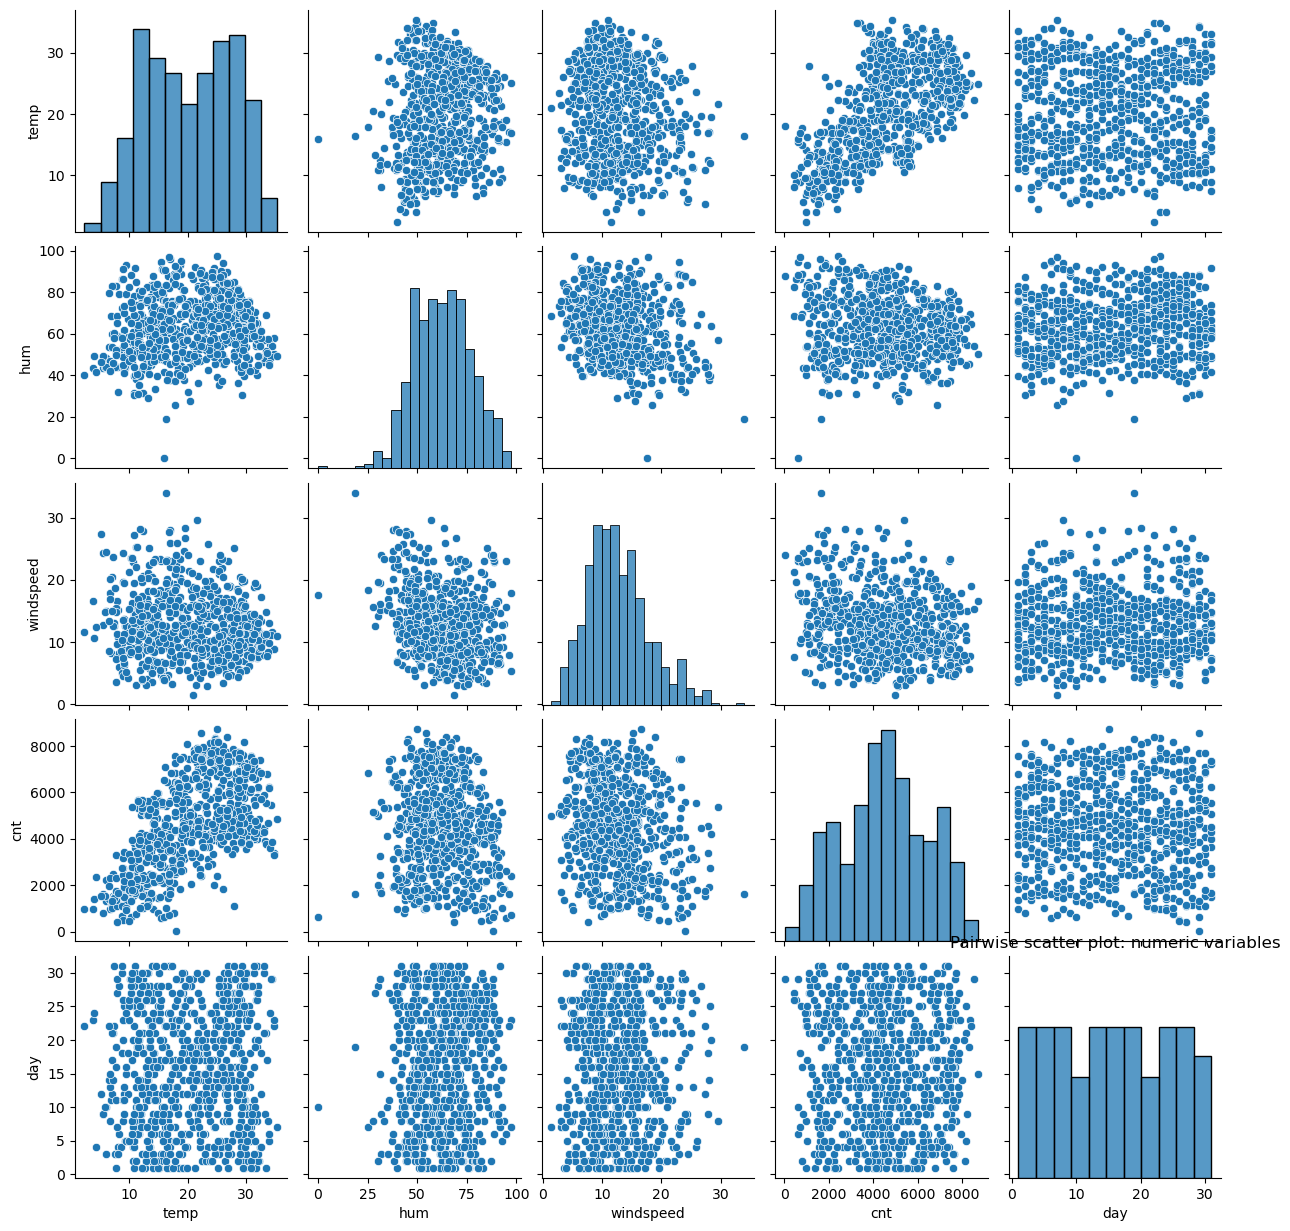

In [242]:
# Multivariate analysis

# Pairwise scatter plot: numeric variables
sns.pairplot(df[numeric_variables])
plt.title("Pairwise scatter plot: numeric variables")
plt.show()


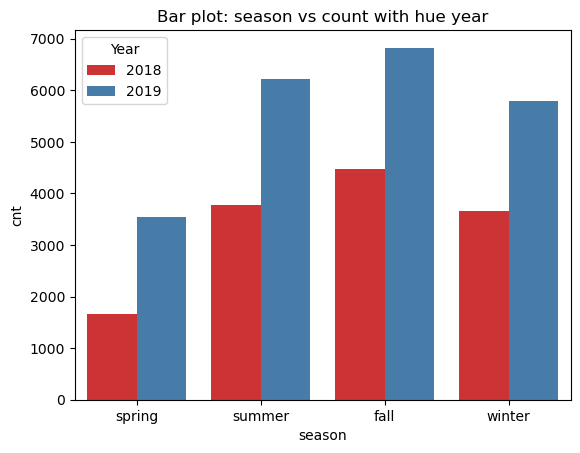

In [190]:
# Multivariate analysis

# Bar plot: 'season' vs 'cnt' with hue 'yr'
plt.figure()
sns.barplot(data=df, x='season', y='cnt', hue='yr', palette='Set1', hue_order=[0, 1], ci=None, dodge=True)
plt.title("Bar plot: season vs count with hue year")
plt.legend(title='Year', labels=['2018', '2019'])
plt.show()

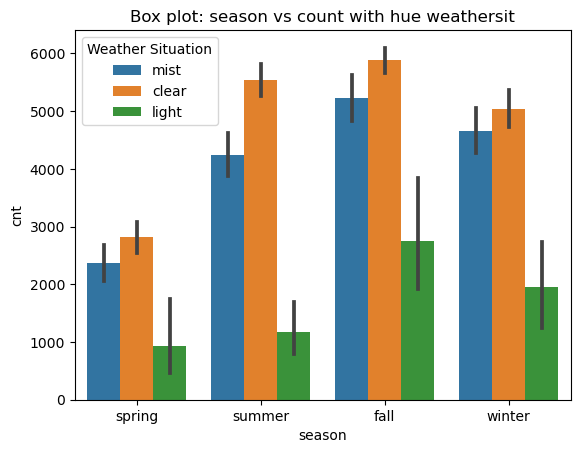

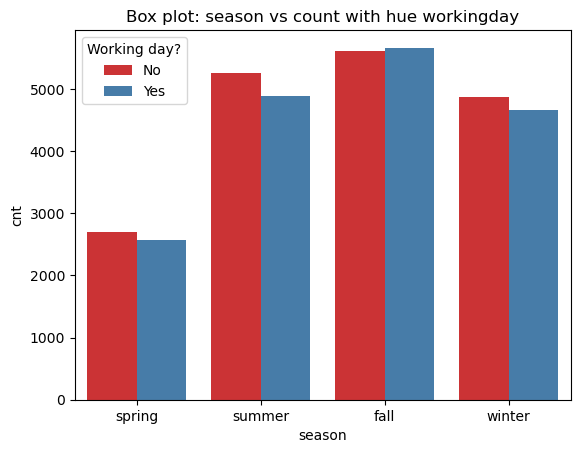

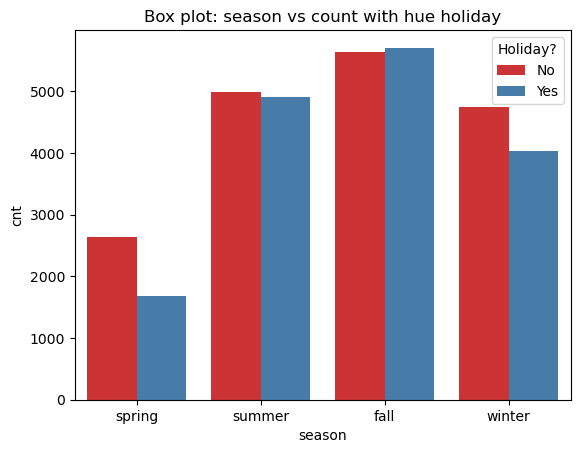

In [243]:
# Multivariate analysis

# Bar plot: 'season' vs 'cnt' with hue 'weathersit'
plt.figure()
sns.barplot(data=df, x='season', y='cnt', hue='weathersit', hue_order=['mist', 'clear', 'light'])
plt.title("Box plot: season vs count with hue weathersit")
plt.legend(title='Weather Situation')
plt.show()


# Bar plot: 'season' vs 'cnt' with hue 'workingday'
plt.figure()
sns.barplot(data=df, x='season', y='cnt', hue='workingday', hue_order=[0,1], palette='Set1', ci=None, dodge=True)
plt.title("Box plot: season vs count with hue workingday")
plt.legend(title='Working day?', labels=['No', 'Yes'])
plt.show()


# Bar plot: 'season' vs 'cnt' with hue 'holiday'
plt.figure()
sns.barplot(data=df, x='season', y='cnt', hue='holiday', hue_order=[0,1], palette='Set1', ci=None, dodge=True)
plt.title("Box plot: season vs count with hue holiday")
plt.legend(title='Holiday?', labels=['No', 'Yes'])
plt.show()


<Figure size 640x480 with 0 Axes>

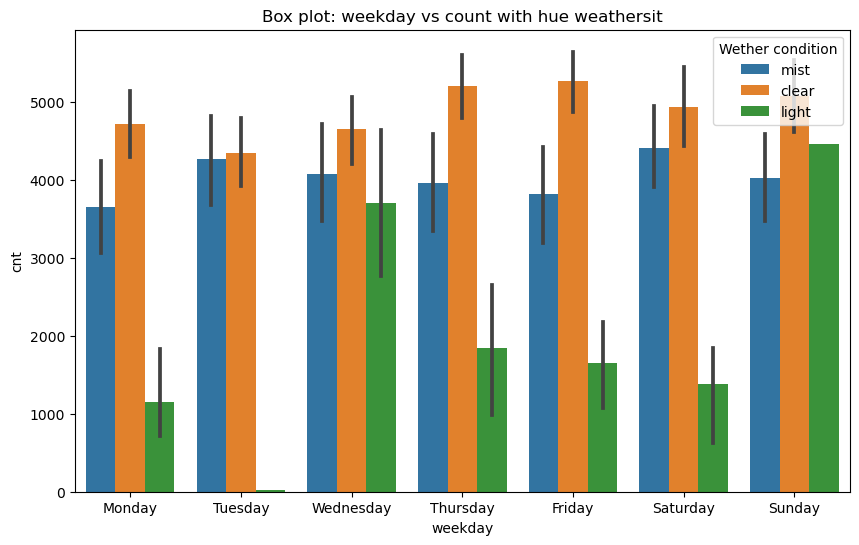

In [69]:
# Multivariate analysis
# Bar plot: 'weekday' vs 'cnt' with hue 'weathersit'

plt.figure()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='cnt', hue='weathersit', hue_order=['mist','clear','light'])
plt.title("Box plot: weekday vs count with hue weathersit")
plt.legend(title='Wether condition')
plt.show()

<Figure size 640x480 with 0 Axes>

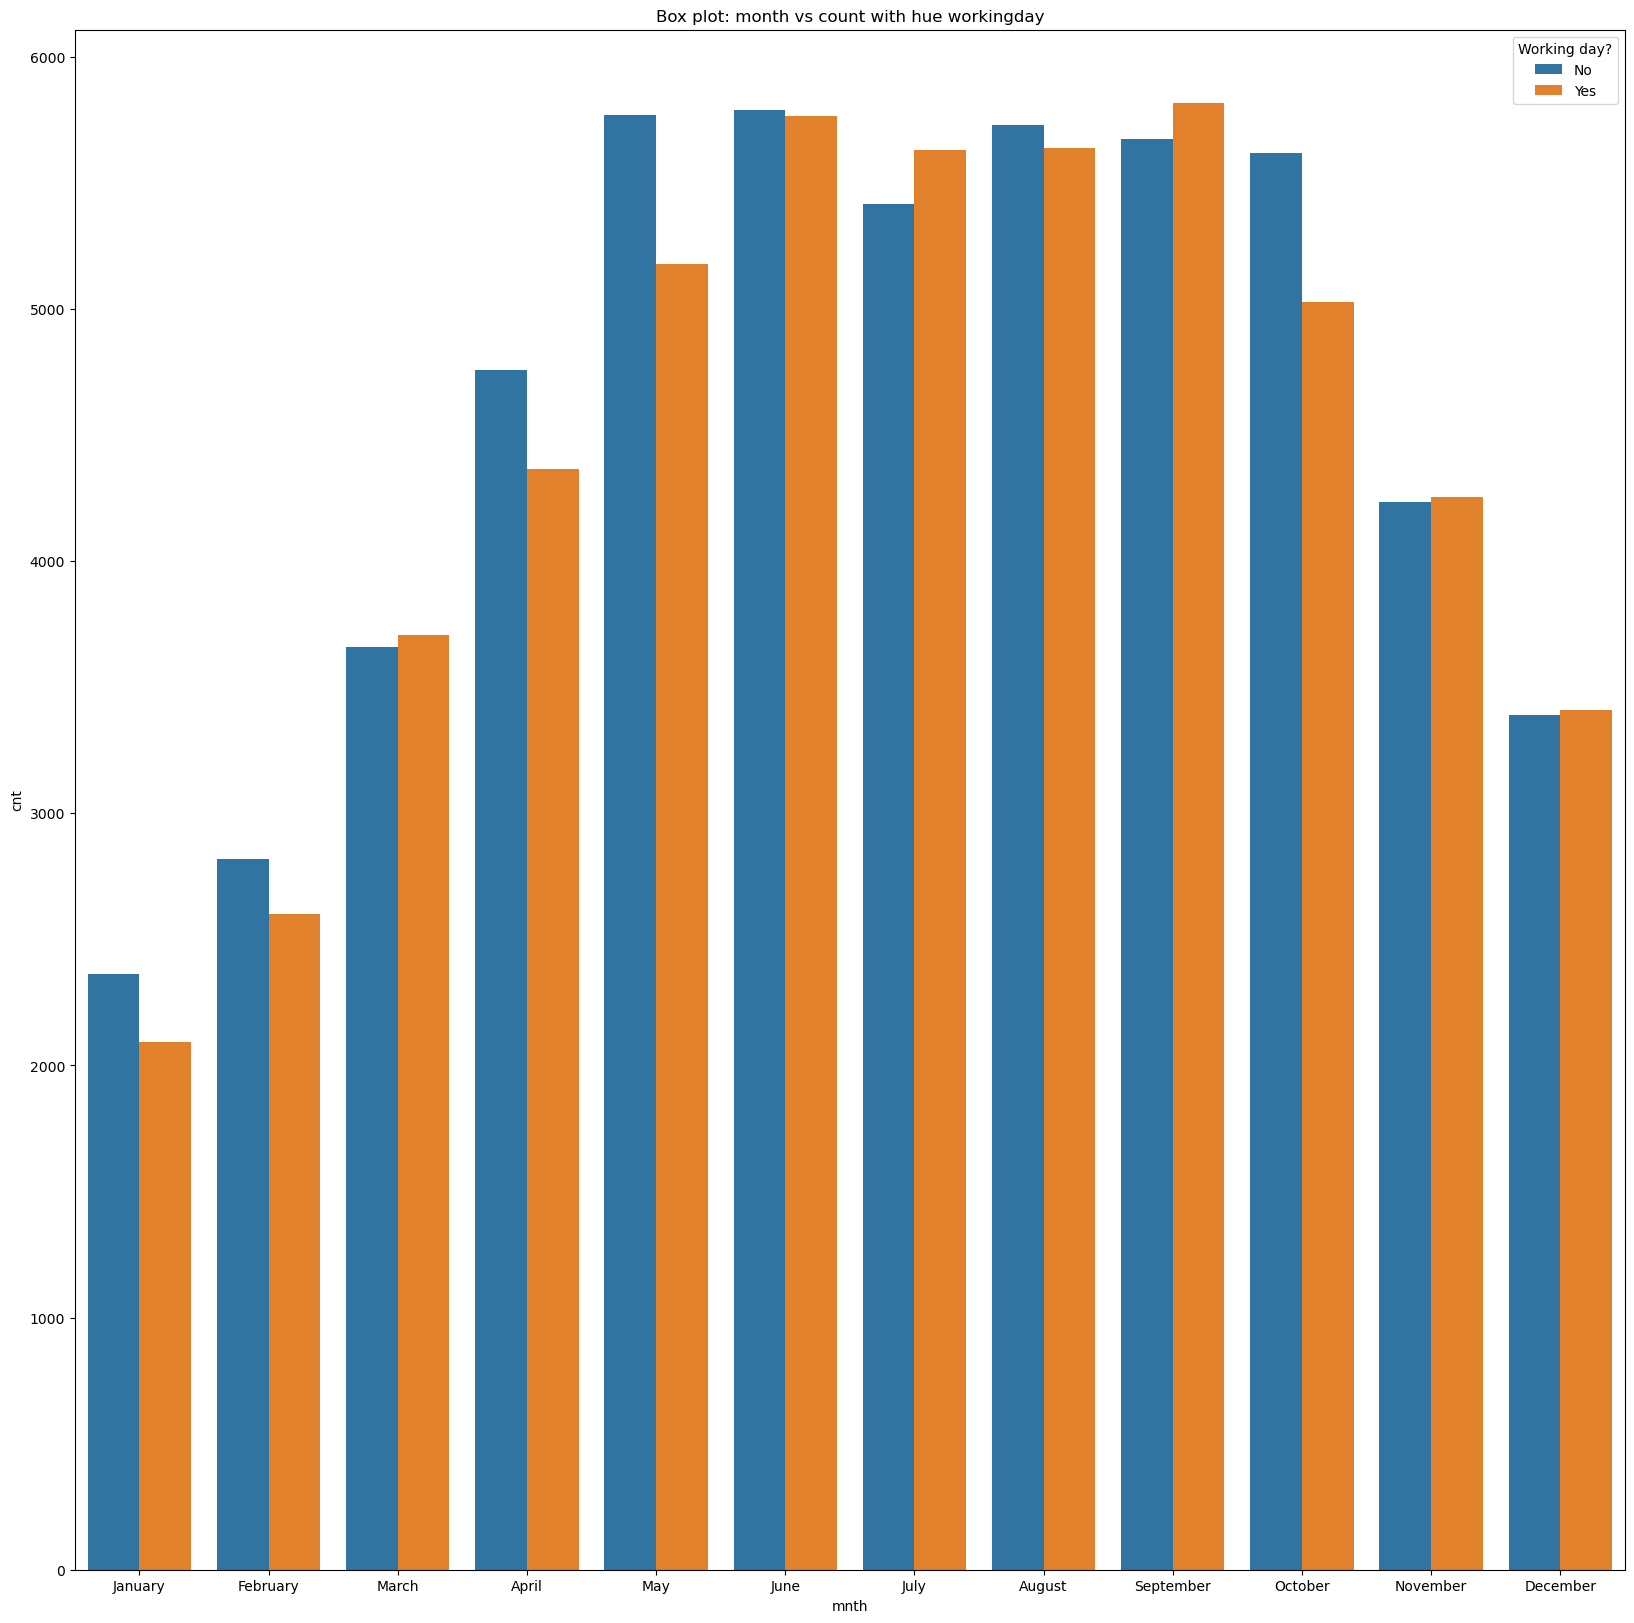

In [244]:
# Multivariate analysis
# Bar plot: 'month' vs 'cnt' with hue 'workingday'

plt.figure()
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='mnth', y='cnt', hue='workingday', hue_order=[0,1],ci=None, dodge=True)
plt.title("Box plot: month vs count with hue workingday")
plt.legend(title='Working day?', labels=['No','Yes'])
plt.show()

<Figure size 640x480 with 0 Axes>

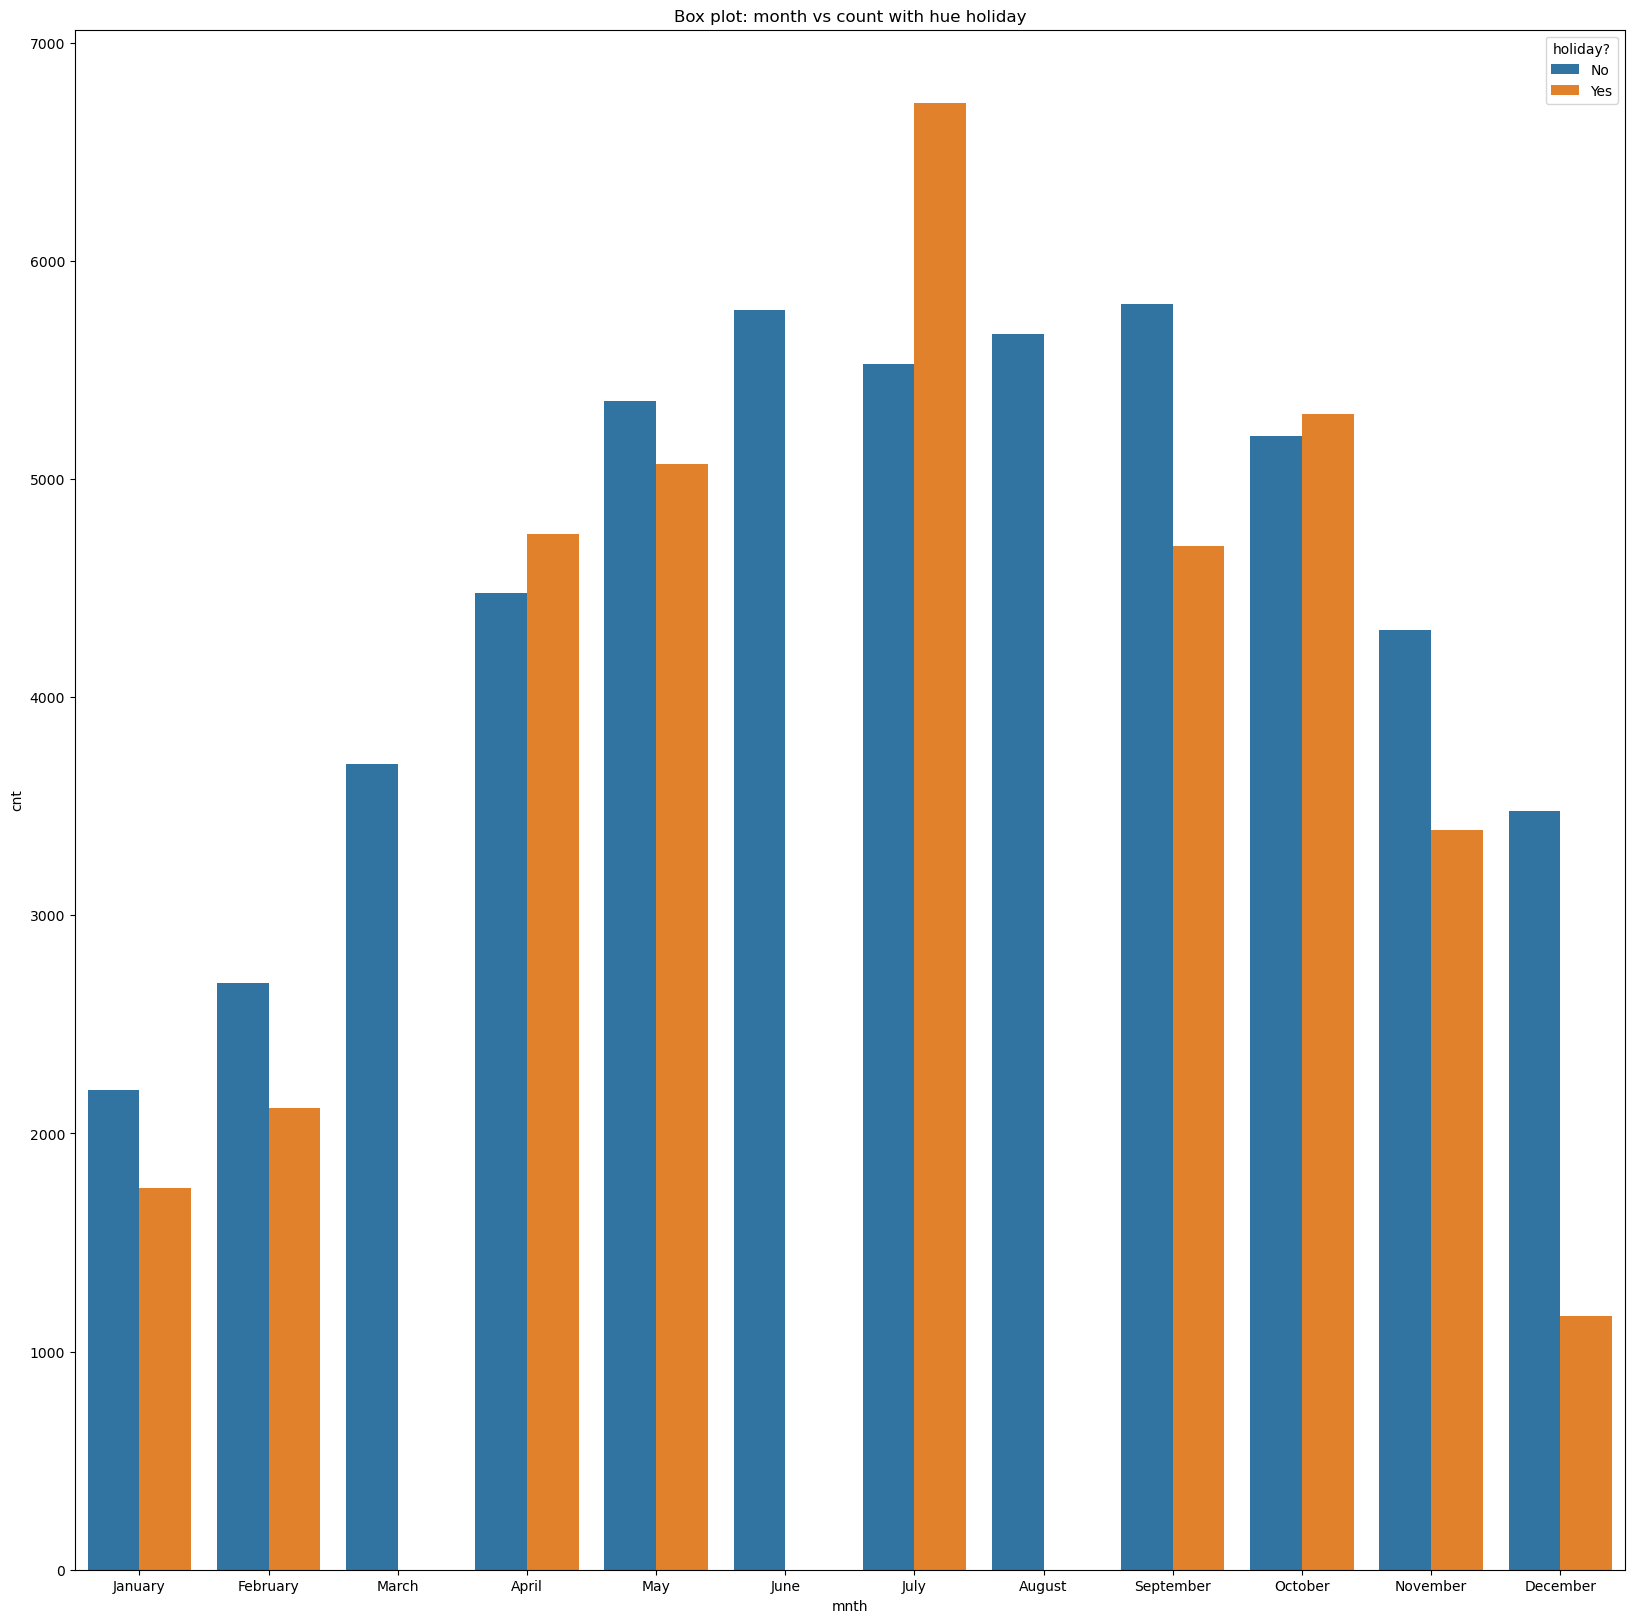

In [245]:
# Multivariate analysis
# Bar plot: 'month' vs 'cnt' with hue 'holiday'

plt.figure()
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='mnth', y='cnt', hue='holiday', hue_order=[0,1],ci=None, dodge=True)
plt.title("Box plot: month vs count with hue holiday")
plt.legend(title='holiday?', labels=['No','Yes'])
plt.show()

<Figure size 640x480 with 0 Axes>

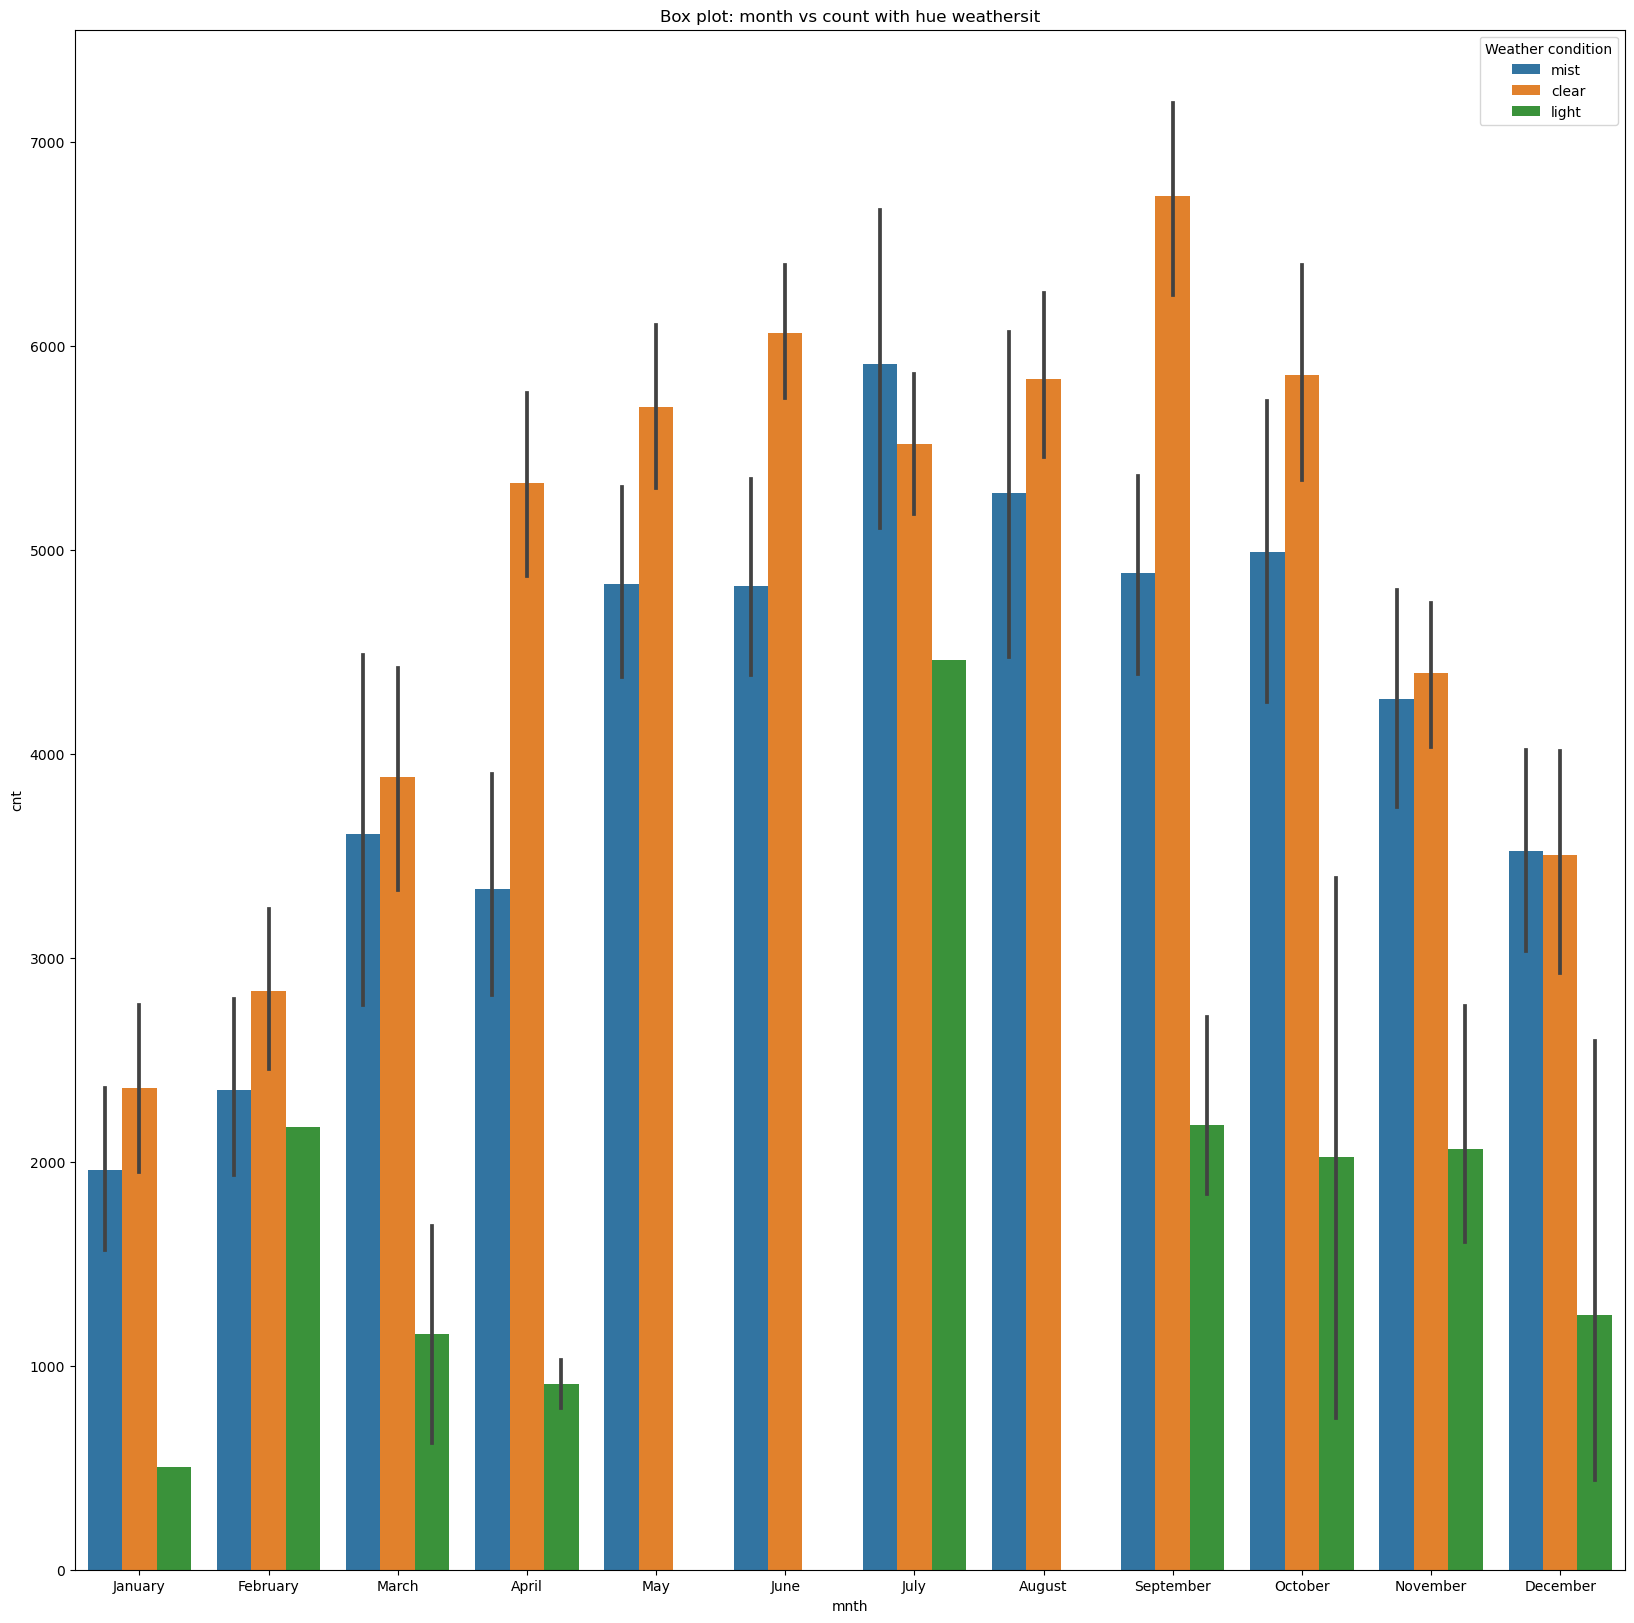

In [246]:
# Multivariate analysis

# Bar plot: 'month' vs 'cnt' with hue 'weathersit'
plt.figure()
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='mnth', y='cnt', hue='weathersit', hue_order=['mist','clear','light'])
plt.title("Box plot: month vs count with hue weathersit")
plt.legend(title='Weather condition')
plt.show()

Thus far, there is no clear trend is noted that might indicate the predictive power of a variable. 
The bivariate and multivariate analysis only somewhat imply the high-level trends noted through univariate analysis. 
So we will proceed further with model building. But before we build our model, we need to handle the catagorical variables by encoding them using dummy variables. For the non-binary catgorical features with n levels we obtain n-1 dummies. 
The binary catgorical features ('yr', 'holiday', and 'workingday' with two levels of 0 and 1) are already in the right form in the dataset. So, we proceed with encoding 'season', 'mnth', 'weathersit', and 'weekday'.

### Handling catagorical variables: Encoding using dummy variables

In [247]:
dummy_var_col = ['season', 'mnth', 'weathersit', 'weekday']

# Obtaining the dummy variables for the features in dummy_var_col and temporarily storing it in 'status'

status = pd.get_dummies(df[dummy_var_col], drop_first=True) #  The information that is eliminated by dropping the first column is already implicit in the combination of the remaining n-1 column values 
status

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weathersit_light,weathersit_mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [248]:
df = pd.concat([df, status], axis = 1)  # Adding the encoded features to the original dataframe df
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,...,mnth_October,mnth_September,weathersit_light,weathersit_mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,spring,0,January,0,1,mist,14.110847,80.5833,10.749882,985,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,January,0,1,mist,14.902598,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,January,0,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,January,0,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,January,0,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [249]:
#as we have now created the dummies for the non-binary catagorical variables, we can drop the variables 'season', 'mnth', 'weathersit', and 'weekday'   
df.drop(['season', 'mnth', 'weathersit', 'weekday'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_October,mnth_September,weathersit_light,weathersit_mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,2,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,3,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,4,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# Displaying information pertaining to the updated dataframe after pre-processing the data so far
print("Dataframe shape:", df.shape)
print("\n Count of null values in each column of the dataframe \n",df.isnull().sum())   
print("\n Count of unique values in each column of the dataframe \n", df.nunique())
df.info()  # to take a look at the data types

Dataframe shape: (730, 30)

 Count of null values in each column of the dataframe 
 yr                   0
holiday              0
workingday           0
temp                 0
hum                  0
windspeed            0
cnt                  0
day                  0
season_spring        0
season_summer        0
season_winter        0
mnth_August          0
mnth_December        0
mnth_February        0
mnth_January         0
mnth_July            0
mnth_June            0
mnth_March           0
mnth_May             0
mnth_November        0
mnth_October         0
mnth_September       0
weathersit_light     0
weathersit_mist      0
weekday_Monday       0
weekday_Saturday     0
weekday_Sunday       0
weekday_Thursday     0
weekday_Tuesday      0
weekday_Wednesday    0
dtype: int64

 Count of unique values in each column of the dataframe 
 yr                     2
holiday                2
workingday             2
temp                 498
hum                  594
windspeed            649
cnt 

### Data splitting into Test and Train datasets

The data is split into 2 parts:
- Train Dataset (on which model will be build and is ~70% of the total data)
- Test Dataset (on which build model will be tested and is ~30% of the total data)

In [265]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print ("Shape of test dataset ", df_test.shape)
print ("Shape of train dataset ", df_train.shape)

Shape of test dataset  (219, 30)
Shape of train dataset  (510, 30)


The difference of 1 record between the original dataset of shape (730, 30) and the train-test splitted datasets is attributed to rounding during the split, as the split sizes are calculated based on percentages.

### Feature Rescaling

In [266]:
# checking the range of numerical variables
df[['temp','hum','windspeed','cnt','day']].describe()

,temp,hum,windspeed,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849,15.720548
std,7.506729,14.237589,5.195841,1936.011647,8.802278
min,2.424346,0.000000,1.500244,22.000000,1.000000
25%,13.811885,52.000000,9.041650,3169.750000,8.000000
50%,20.465826,62.625000,12.125325,4548.500000,16.000000
75%,26.880615,72.989575,15.625589,5966.000000,23.000000
max,35.328347,97.250000,34.000021,8714.000000,31.000000


It would be convenient at the time of model evaluation if the units of the coefficients obtained are all on the same scale. Therefore, we proceed with rescaling the numerical features, excluding the yes-no/0-1 and dummy variables (as we would otherwise lose their interpretability, should we scale them as well).

In [267]:
scaler = MinMaxScaler()   #instantiating an object of the MinMaxScaler class 

num_vars = ['temp','hum','windspeed','cnt','day']  #numerical features to be scaled

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_October,mnth_September,weathersit_light,weathersit_mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0.500000,0,0,...,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.066667,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0.966667,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.900000,0,1,...,0,0,0,1,0,0,1,0,0,0


In [268]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt,day
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.487124
std,0.225844,0.145882,0.169797,0.224593,0.296648
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.233333
50%,0.540519,0.653714,0.296763,0.518638,0.500000
75%,0.735215,0.754830,0.414447,0.684710,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000


We note that the scaled variables now range between 0 and 1.

### Dividing into X (independent variables) and Y (dependent variable) sets for model building

In [269]:
y_train = df_train.pop('cnt')   #the total count 'cnt' is our target variable
X_train = df_train

### Model Building through Recursive Feature Selection

We use the class LinearRegression from scikit-learn for building the model for its compatibility with the class RFE that will enable us to select features by recursively considering smaller and smaller sets of features.

In [270]:
lm = LinearRegression()   # creates an instance of the LinearRegression class
lm.fit(X_train, y_train)  # fits the model to the training data. (The fit method is used to train the model by finding the optimal coefficients that minimize the sum of squared residuals between the predicted values and the actual target values.)

# running RFE with the output number of the variable equal to 15
rfe = RFE(estimator=lm, n_features_to_select=15)     # creates an instance of the RFE class         
rfe = rfe.fit(X_train, y_train)   # fits the RFE model to the training data (The fit method is called to perform the feature selection process. It uses the specified linear regression model (lm) to train and evaluate the importance of each feature based on their coefficients.)

The rfe object now contains the trained RFE model with the selected top 15 features. These selected features are considered the most important or informative features for predicting the target variable. We can access the selected features using the rfe.support_ attribute, which returns a boolean mask indicating the selected features, and rfe.ranking_ attribute, which returns the feature ranking based on their importance.

In [271]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
22,weathersit_mist,True,1
21,weathersit_light,True,1
20,mnth_September,True,1
18,mnth_November,True,1
13,mnth_January,True,1
11,mnth_December,True,1
9,season_winter,True,1
14,mnth_July,True,1
7,season_spring,True,1


In [272]:
col = X_train.columns[rfe.support_]
print ("The top 15 features selected", col)

The top 15 features selected Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')


#### Model building (using statsmodel for detailed statistics): 1st iteration 

In [273]:
X_train_rfe = X_train[col]   #Creating dataframe with RFE selected variables
X_train_sm = sm.add_constant(X_train_rfe) # Adding a constant variable
lr = sm.OLS(y_train, X_train_sm)  # creates an instance of the OLS class which represents the Ordinary Least Squares regression model 
lr_model = lr.fit() # fits the OLS model to the training data by estimating the coefficients of the linear regression model
lr_model.summary() #displays a summary of the various statistical metrics and information about the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        15:25:14   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3202      0.036      8.886      0.000       0.249       0.391
yr                   0.2303      0.008     28.511      0.000       0.214       0.246
holiday             -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                 0.4800      0.037     12.977      0.000       0.407       0.553
hum                 -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed           -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring       -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer        0.0408      0.015      2.659      0.008       0.011       0.071
season_winter        0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December       -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January        -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November       -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September       0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_light    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_mist     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The standard error measures the variability in the estimate of the coefficients. The standard error in this model is low, which is favorable.

In regression model building, the null hypothesis corresponding to each p-value is that the corresponding independent variable does not impact the dependent variable. The alternate hypothesis is that the corresponding independent variable impacts the response. Now, p-value indicates the probability that the null hypothesis is true. Therefore, a low p-value, i.e. less than 0.05, indicates that we can reject the null hypothesis. In other words, we can say that the independent variables that have a low p-value are likely to be a meaningful addition to the model.
All the p-values of the features here are less than 0.05. Therefore, all these 15 features are significant.

Both R-squared (84.5%) and Adjusted R-squared (84.1%) statistics are high, which indicates the accuracy of the model. The higher the R-squared, the better the model fits the data.
It must be noted that the adjusted R-squared is a better metric than R-squared to assess how good the model fits the data. R-squared always increases if additional variables are added into the model, even if they are not related to the dependent variable. Adjusted R-squared penalises R-squared for unnecessary addition of variables. So, if the variable added does not increase the accuracy adequately, adjusted R-squared decreases although R-squared might increase.

The "Prob (F-statistic)" value in the summary table of the linear regression model provides information about the overall significance of the model. It is essentially a p-value associated with the F-statistic, which tests the null hypothesis that all of the regression coefficients in the model are equal to zero (i.e., the model has no predictive power). A small Prob (F-statistic) value suggests that the model as a whole is statistically significant and provides evidence against the null hypothesis. It indicates that at least one of the predictors in the model is significantly related to the target variable. On the other hand, a large Prob (F-statistic) value suggests that there is insufficient evidence to reject the null hypothesis, and the model may not be statistically significant in predicting the target variable.
The low Prob (F-statistic) value of 3.34e-189 in this case (is less than 0.05) indicates that the overall model is statistically significant and provides a good fit to the data.

Overall, all the important indicators are in favor of this model's fitness and accuracy. So we proceed with assessing multicollinearity by computing the variance inflation factor (VIF).

In [274]:
# Calculating the varience inflation factors for this model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


VIF = 5 is considered the threshold here. 
However, the VIF values for both 'hum' and 'temp' are very high.
As previously noted, both 'hum' and 'temp' are significant, as their p-values are less than 0.05.
We will proceed with dropping one variable, the 'hum' feature, and develop the model again.

#### Model building (using statsmodel for detailed statistics): 2nd iteration 

In [275]:
col = col.drop(['hum'])    # dropping the 'hum' 
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.57e-186
Time:                        15:26:26   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2466      0.032      7.679      0.000       0.184       0.310
yr                   0.2343      0.008     28.709      0.000       0.218       0.250
holiday             -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                 0.4377      0.036     12.083      0.000       0.366       0.509
windspeed           -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring       -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer        0.0333      0.015      2.148      0.032       0.003       0.064
season_winter        0.0887      0.018      4.951      0.000       0.053       0.124
mnth_December       -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_January        -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July           -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_November       -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_September       0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_light    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_mist     -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
# Calculating the varience inflation factors for this second-iteration model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_mist,1.56


After dropping the 'hum' feature, the model that we have developed in this second iteration seems favorable as the 
- R-squared and Adjusted R-squared statistics are approximately 84% and 83.5%, indicating good accuracy of the model.
- Standard errors of the coefficients are low
- p-values of all the features are less than 0.05, indicating that all the 14 independent variables in this model are significant
- Prob (F-statistic) is as low as 2.91e-186 (<0.05), indicating the overall statistical significance of the model and its good fit to the data
- VIF of all the features is below the threshold of 5, inidcating low multicollinearity of the 14 features in this model.
  Although VIF of temp is slightly above 5, we are still retaining it. In fact, when experimented further by dropping 'temp', the r-squared statistics decreases below 79% and other features become insignnificant (p becomes >0.05). So, we will not proceed further with dropping 'temp'.  Similarly, upon experimenting with increasing the number of variables or dropping other variables, no better result was obtained.

Therefore, we can stop the iteration of model building at this stage, as all indicators convey that our model is optimal.
So, we proceed further with residual analsyis, wherein we check if the assumptions of linear regression hold for our model.

### Validation of linear regression assumptions

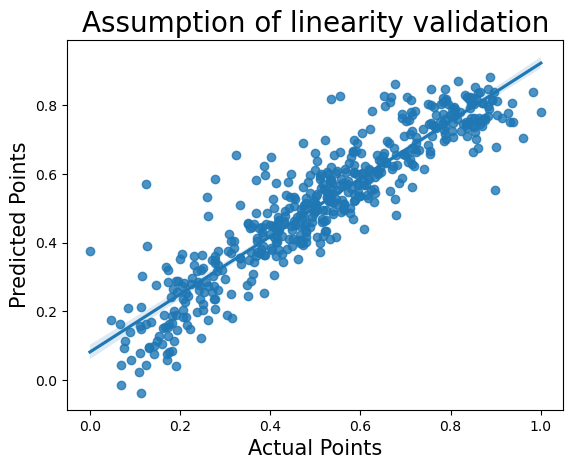

In [278]:
# Validating the assumption of linearity between the target variable and the input variables

y_train_pred = lr_model.predict(X_train_sm)  #predicting on the train set

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Assumption of linearity validation', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

Text(0.5, 0, 'Errors')

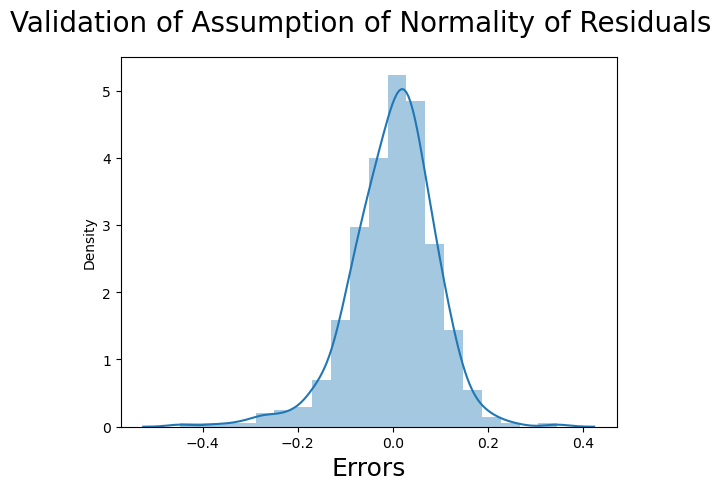

In [279]:
# Residual Analysis

res =  y_train - y_train_pred  # calculating the residual

# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Validation of Assumption of Normality of Residuals', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

The residuals exhibit normal distribution, with the mean centered around zero. This validates the assumption of linear regression that error terms are normally distributed.

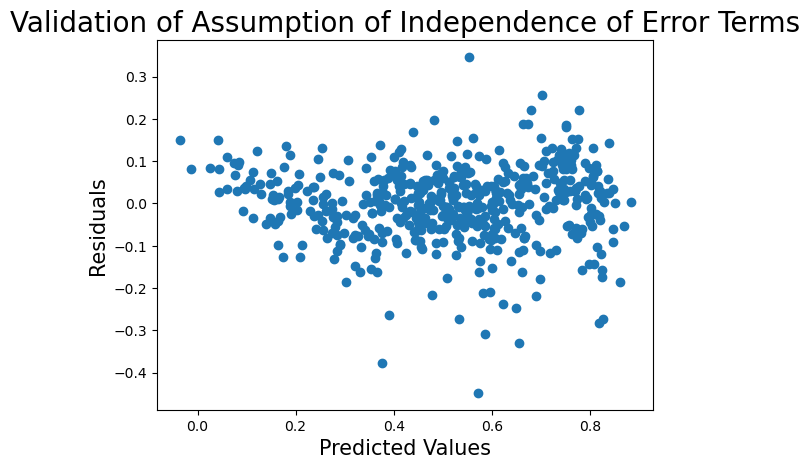

In [280]:
# checking for patterns in residuals (it is expected that there should not be any identifiable pattern)
plt.scatter(y_train_pred, res)
plt.title('Validation of Assumption of Independence of Error Terms', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

There are no visible patterns in the error terms. So, the error terms are independent of each other.

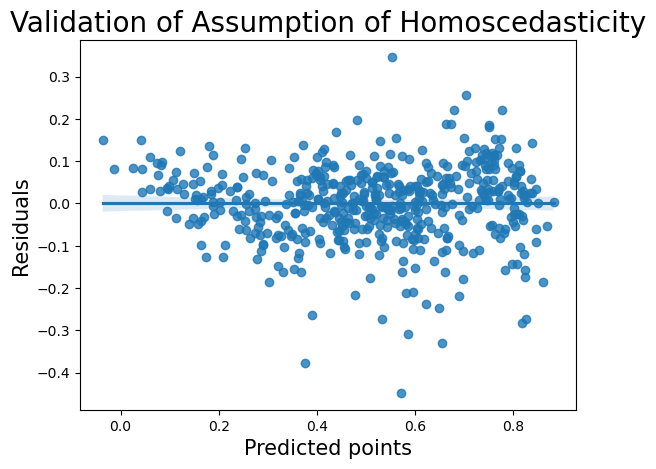

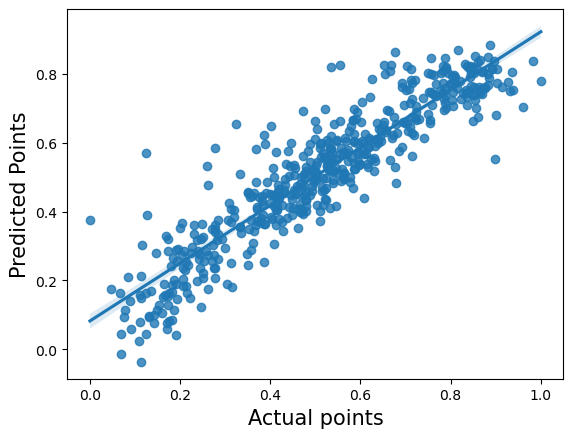

In [285]:
# Checking homoscedasticity

sns.regplot(x=y_train_pred, y=res)
plt.title('Validation of Assumption of Homoscedasticity', fontdict={'fontsize': 20})
plt.xlabel('Predicted points', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()


sns.regplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

These plots validate the linear regression assumption that error terms have constant variance. No particular pattern in the varience noted.

### Prediction and Evaluation on the Test Set

In [286]:
# transforming the test data, since we had previously scaled the training data

num_vars = ['temp','hum','windspeed','cnt','day']  #numerical features to be transformed

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_October,mnth_September,weathersit_light,weathersit_mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0.100000,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0.633333,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0.866667,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0.300000,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0.033333,0,1,...,0,0,0,0,0,1,0,0,0,0


In [287]:
#Splitting between X and Y (target feature)
y_test = df_test.pop('cnt')
X_test = df_test

In [288]:
X_test_new = X_test[X_train_rfe.columns]  # Retaining only the 14 variables in our model determined previously

X_test_sm = sm.add_constant(X_test_new)  # adding a constant
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_light,weathersit_mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0,0


In [289]:
y_test_pred = lr_model.predict(X_test_sm)  # predicting on the test set

r2_score(y_true = y_test , y_pred = y_test_pred) # model evaluation

0.8132736736429256

**Since the r2_score on the test set (81.3%) is close to the R-squared value on the train set (84%), i.e., the difference is within 5%, therefore we could say that what our model has learnt on the train set is appropriately generalized on the test set.
Thus, our model appropriately predicts the demand for shared bikes.**

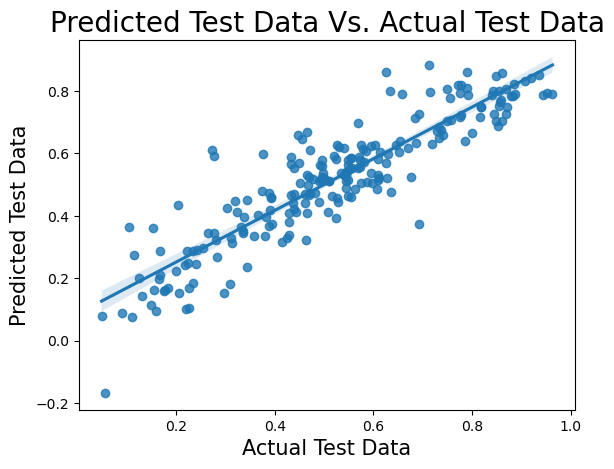

In [290]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Data Vs. Actual Test Data', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Data', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Data', fontdict={'fontsize': 15})
plt.show()

**The equation of our best fitted line is**

cnt = 0.2466 + 0.2343 * yr - 0.0919 * holiday + 0.4377 * temp - 0.1586 * windspeed - 0.0716 * season_spring + 0.0333 * season_summer + 0.0887 * season_winter - 0.0445 * mnth_December - 0.0503 * mnth_January - 0.0504 * mnth_July - 0.0419 * mnth_November + 0.0682 * mnth_September - 0.2929 * weathersit_light - 0.0814 * weathersit_mist

We may still develop this model further by using advanced regression techniques.